# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

*Цель исследования*:
- Научиться определять рыночную стоимость объектов недвижимости.
- Провести исследовательский анализ данных и установить параметры, влияющие на цену объектов.
- Построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

*Ход исследования*

Необходимые данные получу из датасета `'/datasets/real_estate_data.csv'`. О состоянии и качестве данных ничего не известно, поэтому я сначала открою файл и изучу общую информацию.

Далее займусь предобработкой данных:
- Если будут проблемы с наименованием столбцов, то переименую их, чтобы привести к удобным и читаемым названиям.
- Проверю на явные дубликаты и если такие имеются, то удалю.
- Проверю на наличие пропусков и обработаю их.
- Если будет необходимость, то исправлю типы данных
- Обработаю неявные дубликаты.
- Для удобного анализа в дальнейшем - добавлю необходимые столбцы.

Затем перейду к исследовательскому анализу данных:
- Изучу и опишу необходимые параметры.
- Изучу как быстро продавались квартиры.
- Определю факторы, которые больше всего влияют на стоимость квартиры
- Посчитаю среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
- Посчитаю среднюю цену для каждого километра от центра в Санкт-Петербурге

В конце напишу общий вывод.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

# Прочитаем первые 10 строк таблицы
with pd.option_context('display.max_columns', None): 
    display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# Выведем общую информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограммы для каждого столбца
Для определения количество bins воспользуемся стандартной формулой из Excel - квадратный корень из количества строк в таблице

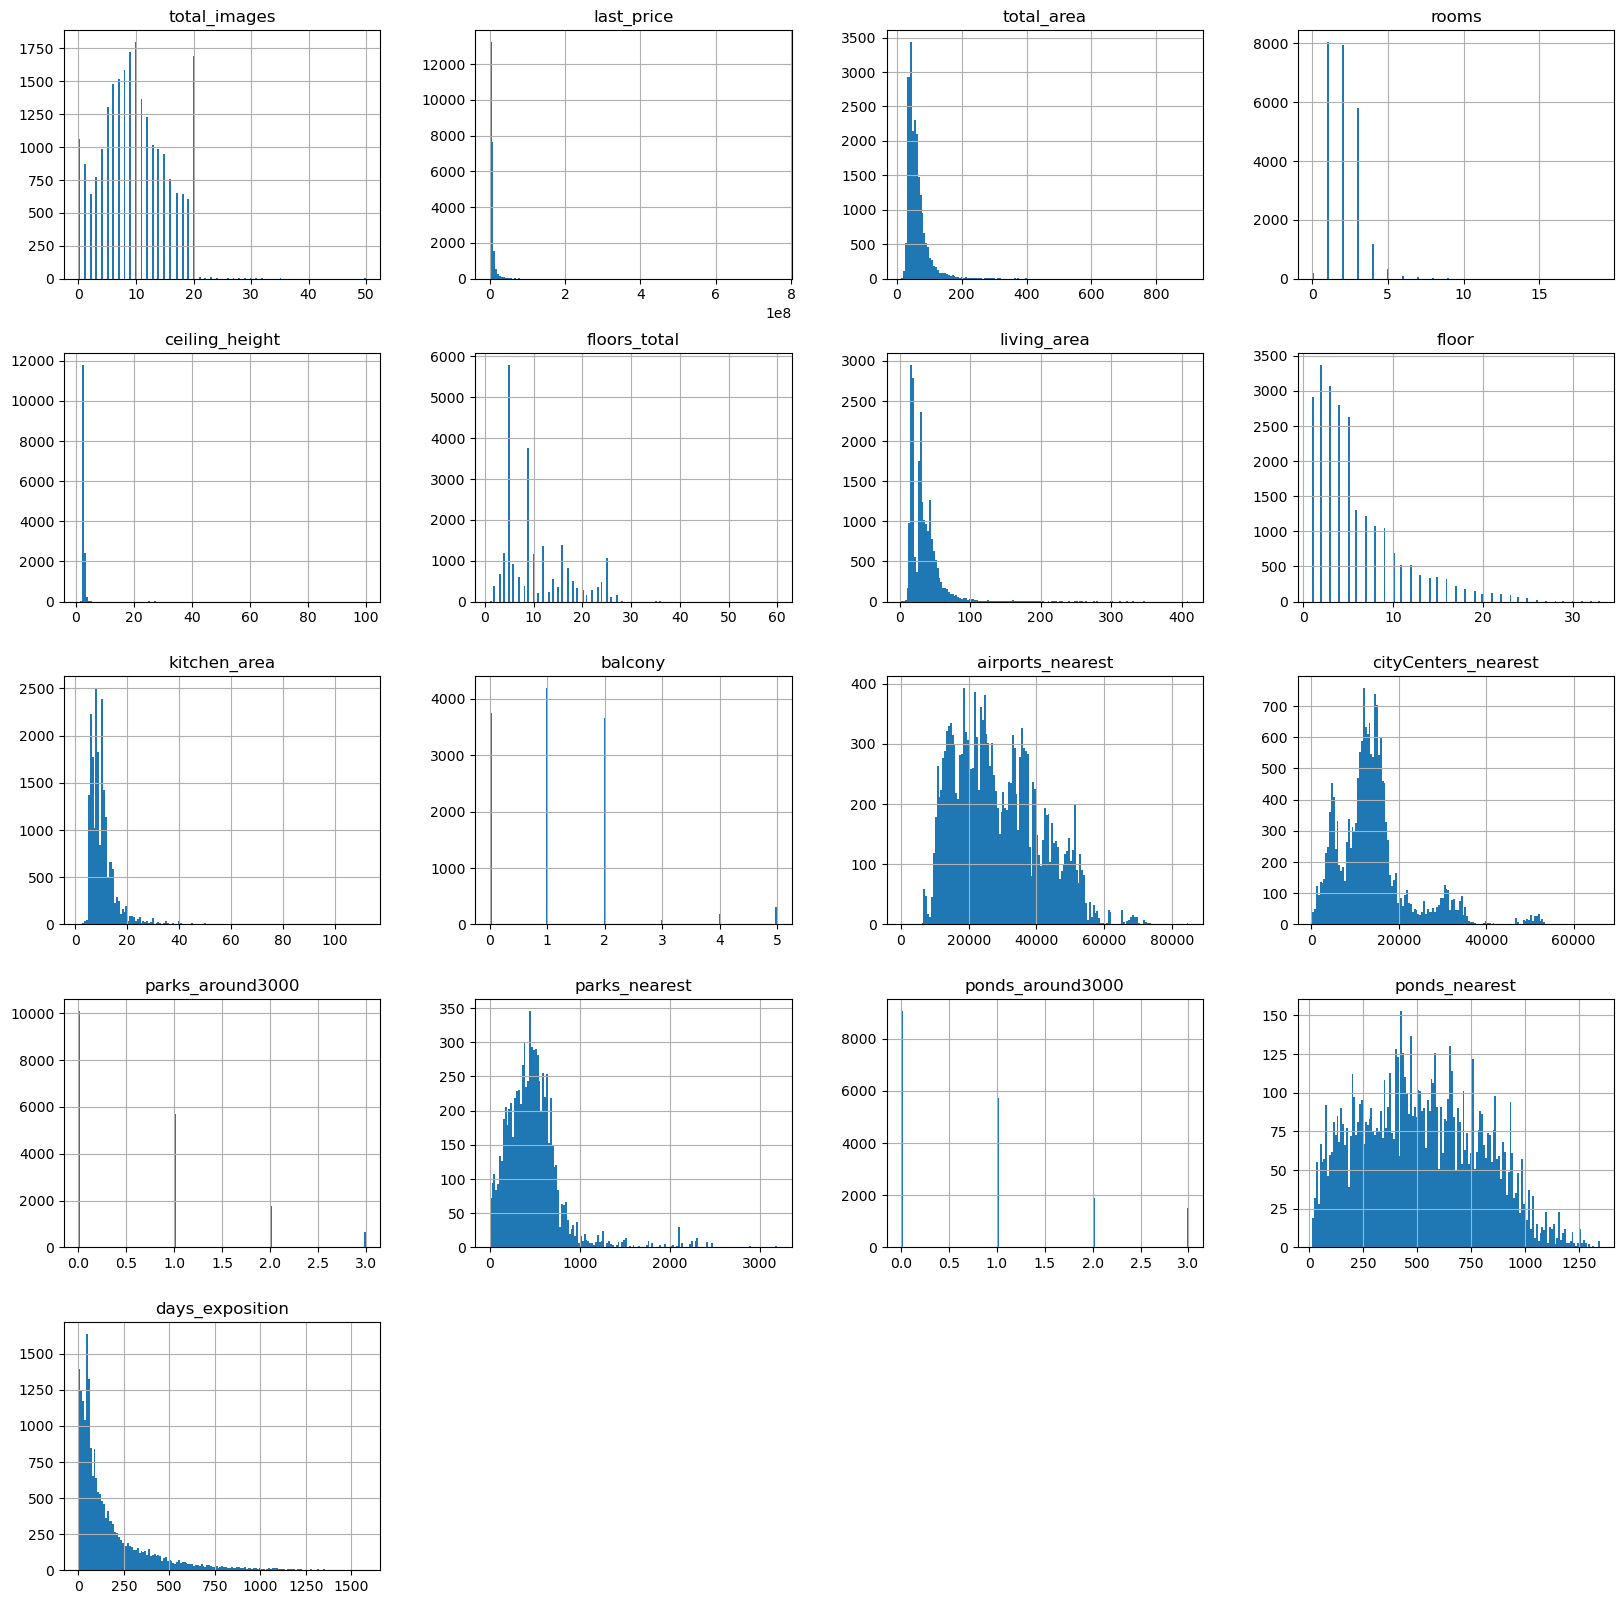

In [5]:
data.hist(figsize=(20, 20), bins=np.sqrt(data.shape[0]).astype(int))
plt.show()

Я смог прочитать датасет, каких-то проблем с этим не возникло.

Из информации о таблице мы видим, что это довольно большой датасет на 23698 строк и 22 колонки, во многих столбцах есть пропуски. Некоторые столбцы имеют неподходящие для них типы данных.

Из полученных гистограмм мы видим, что некоторые данные имеют множество выбросов и провалов. Поэтому их нужно будет обработать, чтобы улучшить качество дальнейшего анализа.

### Выполните предобработку данных

#### Переименование столбцов

Приведём названия столбцов к стандарту snake_case и переименуем столбцы, чтобы они были более понятными.

In [6]:
data.columns = ['total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony_total', 'locality_name', 'airports_nearest_meters', 'city_centers_nearest_meters', 'parks_around_3k_meters', 'parks_nearest_meters', 'ponds_around_3k_meters', 'ponds_nearest_meters', 'days_exposition']

#### Обработка пропусков

Проверим на наличие явных дубликатов

In [7]:
data.duplicated().sum()

0

Определим количество пропусков в каждом столбце

In [8]:
data.isnull().sum()

total_images                       0
last_price                         0
total_area                         0
first_day_exposition               0
rooms                              0
ceiling_height                  9195
floors_total                      86
living_area                     1903
floor                              0
is_apartment                   20924
is_studio                          0
is_open_plan                       0
kitchen_area                    2278
balcony_total                  11519
locality_name                     49
airports_nearest_meters         5542
city_centers_nearest_meters     5519
parks_around_3k_meters          5518
parks_nearest_meters           15620
ponds_around_3k_meters          5518
ponds_nearest_meters           14589
days_exposition                 3181
dtype: int64

Посмотрим на долю пропусков в каждом столбце

In [9]:
data.isnull().sum() / data.shape[0]

total_images                   0.000000
last_price                     0.000000
total_area                     0.000000
first_day_exposition           0.000000
rooms                          0.000000
ceiling_height                 0.387991
floors_total                   0.003629
living_area                    0.080299
floor                          0.000000
is_apartment                   0.882906
is_studio                      0.000000
is_open_plan                   0.000000
kitchen_area                   0.096122
balcony_total                  0.486054
locality_name                  0.002068
airports_nearest_meters        0.233850
city_centers_nearest_meters    0.232879
parks_around_3k_meters         0.232837
parks_nearest_meters           0.659100
ponds_around_3k_meters         0.232837
ponds_nearest_meters           0.615596
days_exposition                0.134225
dtype: float64

Я буду использовать отдельный датафрейм для предварительной обработки данных, чтобы не испортить исходные данные

In [10]:
preprocessed_data = data.copy()

Заполним пропуски в 'balcony' нулями, так как скорее всего пропуски означают, что в квартире нет балконов

In [11]:
preprocessed_data['balcony_total'] = preprocessed_data['balcony_total'].fillna(0)

Заполним пропуски в 'floors_total' единицами, так как скорее всего пропуски означают, что в доме всего один этаж

In [12]:
preprocessed_data['floors_total'] = preprocessed_data['floors_total'].fillna(1)

Заполним пропуски в 'locality_name' строкой 'unknown', так как название населённого пункта неизвестно

In [13]:
preprocessed_data['locality_name'] = preprocessed_data['locality_name'].fillna('unknown')

Заполним пропуски в 'parks_around_3k_meters' нулями, так как скорее всего пропуски означают, что в радиусе 3 км нет парков

In [14]:
preprocessed_data['parks_around_3k_meters'] = preprocessed_data['parks_around_3k_meters'].fillna(0)

Заполним пропуски в 'ponds_around_3k_meters' нулями, так как скорее всего пропуски означают, что в радиусе 3 км нет водоёмов

In [15]:
preprocessed_data['ponds_around_3k_meters'] = preprocessed_data['ponds_around_3k_meters'].fillna(0)

Заполним пропуски в 'days_exposition' нулями, так как скорее всего пропуски означают, что объявление ещё не снято

In [16]:
preprocessed_data['days_exposition'] = preprocessed_data['days_exposition'].fillna(0)

Заполним пропуски в 'is_apartment' False, так как скорее всего пропуски означают, что квартира не является апартаментами

In [17]:
preprocessed_data['is_apartment'] = preprocessed_data['is_apartment'].fillna(False)

Посмотрим на описание столбца 'ceiling_height'

In [18]:
preprocessed_data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Видим, что в столбце 'ceiling_height' есть аномально большие значения.
Посмотрим какие уникальные значения больше 10 есть в столбце 'ceiling_height' и отсортируем их по возрастанию.

In [19]:
sorted(preprocessed_data.query('ceiling_height > 10')['ceiling_height'].unique())

[10.3, 14.0, 20.0, 22.6, 24.0, 25.0, 26.0, 27.0, 27.5, 32.0, 100.0]

Вряд ли в квартирах может быть высота потолков больше 10 метров
Разделим значения в столбце 'ceiling_height', которые больше 10 метров на 10

In [20]:
preprocessed_data.loc[preprocessed_data['ceiling_height'] > 10, 'ceiling_height'] = preprocessed_data.loc[preprocessed_data['ceiling_height'] > 10, 'ceiling_height'] / 10

Посмотрим, зависит ли высота потолков от количества этажей в доме

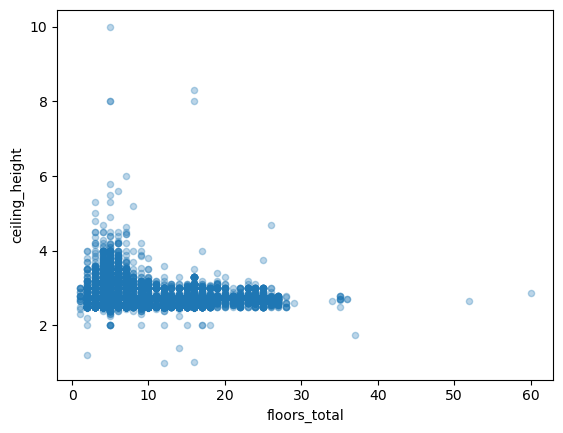

In [21]:
preprocessed_data.plot(x='floors_total', y='ceiling_height', kind='scatter', alpha=0.3)
plt.show()

Видно, что до 10 этажей в доме высота потолков выше, чем в домах с большим количеством этажей.
Заполним пропуски в столбце 'ceiling_height' медианой для домов с таким же количеством этажей

In [22]:
preprocessed_data['ceiling_height'] = preprocessed_data['ceiling_height'].fillna(preprocessed_data.groupby('floors_total')['ceiling_height'].transform('median'))

Заполним пропуски в 'living_area' медианным значением для квартир с таким же количеством комнат

In [23]:
preprocessed_data['living_area'] = preprocessed_data['living_area'].fillna(preprocessed_data.groupby('rooms')['living_area'].transform('median'))

По такому же принципу, как для 'living_area', заполним пропуски в 'kitchen_area'

In [24]:
preprocessed_data['kitchen_area'] = preprocessed_data['kitchen_area'].fillna(preprocessed_data.groupby('rooms')['kitchen_area'].transform('median'))

Посмотрим на описание столбцов 'ponds_nearest_meters' и 'parks_nearest_meters'

In [25]:
display(preprocessed_data['ponds_nearest_meters'].describe())
preprocessed_data['parks_nearest_meters'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest_meters, dtype: float64

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest_meters, dtype: float64

Есть подозрение, что пропуски в столбцах 'ponds_nearest_meters' и 'parks_nearest_meters' появились из-за того, что расстояние до ближайшего водоёма или парка больше 3 км
Проверим, что нет таких строк, где в 'ponds_around_3k_meters' не нулевое значение, а в 'ponds_nearest_meters' есть пропуск

In [26]:
display(preprocessed_data.query('ponds_around_3k_meters != 0')['ponds_nearest_meters'].isnull().sum())

0

Проверим то же самое для 'parks_nearest_meters' и 'parks_around_3k_meters'

In [27]:
preprocessed_data.query('parks_around_3k_meters != 0')['parks_nearest_meters'].isnull().sum()

0

Проверим, что пропуски заполнены во всех столбцах, кроме 'ponds_nearest_meters' и 'parks_nearest_meters'

In [28]:
preprocessed_data.isnull().sum()

total_images                       0
last_price                         0
total_area                         0
first_day_exposition               0
rooms                              0
ceiling_height                     1
floors_total                       0
living_area                        0
floor                              0
is_apartment                       0
is_studio                          0
is_open_plan                       0
kitchen_area                     197
balcony_total                      0
locality_name                      0
airports_nearest_meters         5542
city_centers_nearest_meters     5519
parks_around_3k_meters             0
parks_nearest_meters           15620
ponds_around_3k_meters             0
ponds_nearest_meters           14589
days_exposition                    0
dtype: int64

Видим, что после заполнения, у нас остался всего один пропуск в 'ceiling_height', удалим эту строку

In [29]:
preprocessed_data = preprocessed_data.dropna(subset=['ceiling_height'])

Видим, что у нас 197 неожиданных пропусков в kitchen_area
Проверим, сколько комнат у квартир с пропусками в kitchen_area

In [30]:
preprocessed_data.query('kitchen_area.isnull()')['rooms'].value_counts()

rooms
0    197
Name: count, dtype: int64

Проверим, являются ли эти квартиры студиями или квартирами со свободной планировкой

In [31]:
preprocessed_data.query('kitchen_area.isnull() and (is_studio == True or is_open_plan == True)').shape[0]

197

##### Промежуточный вывод по заполнению пропусков
<a name="intermediate-summary-by-filling-the-blanks"></a>
В данных были пропуски в столбцах `'balcony_total'`, `'floors_total'`, `'locality_name'`, `'parks_around_3k_meters'`, `'ponds_around_3k_meters'`, `'days_exposition'`, `'is_apartment'`, `'ceiling_height'`, `'living_area'`. В столбцах `'kitchen_area'`, `'ponds_nearest_meters'` и `'parks_nearest_meters'` я намерено оставил пропуски. В столбцах `'city_centers_nearest_meters'` и `'airports_nearest_meters'` я временно оставил пропуски.

Пропуски в каждом столбцы были по разным причинам:
- В `'balcony_total'`, `'parks_around_3k_meters'`, `'ponds_around_3k_meters'`, `'days_exposition'` и `'floors_total'` пропуски были заполнены нулями или единицами, как в последнем случае. Я думаю, что для этих столбцов пропуски означают, что в квартире нет балконов, в доме всего один этаж, в радиусе 3 км нет парков и водоёмов, а объявление ещё не снято.
- В `'locality_name'` и `'is_apartment'` пропуски были заполнены строкой `'unknown'` и значением `False` соответственно, так как название населённого пункта неизвестно и квартира не является апартаментами.
- `'ceiling_height'`, `'city_centers_nearest_meters'`, `'living_area'`, `'kitchen_area'`, `'airports_nearest_meters'` - это столбцы с количественными значениями, пропусков не такое большое количество в процентном соотношении и поэтому можно заполнить медианой. Пропуски в данных столбцах могли появиться из-за того, что некоторые данные формировались автоматически и могли быть ошибки в этом процессе, которые привели к пропускам. Также пропуски могли появиться из-за того, что пользователь не заполнил эти поля или данные были утеряны при выгрузке.
- В `'ponds_nearest_meters'` и `'parks_nearest_meters'` пропуски были оставлены, так как по всей видимости они появились из-за того, что расстояние до ближайшего водоёма или парка не учитывалось, если оно больше 3 км. Я проверил это тем, максимальные значения этих столбцов не превышает ~3км. Также нет таких строк, где указывается, что в радиусе 3 км есть парк или водоём, а в столбце с расстоянием до них есть пропуск. Поэтому заполнить пропуски в этих столбцах не получится, но и удалять эти столбцы нельзя, так как они помогут нам в дальнейшем анализе.
- Также в столбце `'kitchen_area'` остались пропуски, так как это студии или квартиры со свободной планировкой. В таких квартирах обычно одна цельная комната, которая вся является жилым помещением и площадь кухни не учитывается.
- Я заполню пропуски в столбцах `'city_centers_nearest_meters'` и `'airports_nearest_meters'`, после того как проверю есть ли неявные дубликаты в столбце `'locality_name'`. Поскольку логично будет заполнить данные пропуски медианной в зависимости от населённого пункта.

#### Изменение типов данных

Посмотрим на типы данных в таблице

In [32]:
preprocessed_data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition            object
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
is_studio                         bool
is_open_plan                      bool
kitchen_area                   float64
balcony_total                  float64
locality_name                   object
airports_nearest_meters        float64
city_centers_nearest_meters    float64
parks_around_3k_meters         float64
parks_nearest_meters           float64
ponds_around_3k_meters         float64
ponds_nearest_meters           float64
days_exposition                float64
dtype: object

Изменим тип данных в столбце 'first_day_exposition' на datetime

In [33]:
preprocessed_data['first_day_exposition'] = pd.to_datetime(preprocessed_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим есть ли в last_price дробные значения

In [34]:
preprocessed_data['last_price'].apply(lambda x: x % 1).sum()

0.0

Изменим тип данных в столбцах 'floors_total', 'balcony_total', 'parks_around_3k_meters', 'ponds_around_3k_meters', 'days_exposition' и 'last_price' на int

In [35]:
for column in ['floors_total', 'balcony_total', 'parks_around_3k_meters', 'ponds_around_3k_meters', 'days_exposition', 'last_price']:
    preprocessed_data[column] = preprocessed_data[column].astype('int')

Проверим, что типы данных изменились на нужные

In [36]:
preprocessed_data.dtypes

total_images                            int64
last_price                              int64
total_area                            float64
first_day_exposition           datetime64[ns]
rooms                                   int64
ceiling_height                        float64
floors_total                            int64
living_area                           float64
floor                                   int64
is_apartment                             bool
is_studio                                bool
is_open_plan                             bool
kitchen_area                          float64
balcony_total                           int64
locality_name                          object
airports_nearest_meters               float64
city_centers_nearest_meters           float64
parks_around_3k_meters                  int64
parks_nearest_meters                  float64
ponds_around_3k_meters                  int64
ponds_nearest_meters                  float64
days_exposition                   

##### Промежуточный вывод по изменению типов данных
<a name="intermediate-summary-on-change-data-types"></a>
В таблице были изменены типы данных в столбцах `'first_day_exposition'`, `'floors_total'`, `'balcony_total'`, `'parks_around_3k_meters'`, `'ponds_around_3k_meters'`, `'days_exposition'` и `'last_price'`.

Я изменил типы по следующим причинам:
- В столбце `'first_day_exposition'` тип данных был изменён на `datetime`, так как это дата публикации объявления и нам нужно будет работать с датами.
- В столбцах `'floors_total'`, `'balcony_total'`, `'parks_around_3k_meters'`, `'ponds_around_3k_meters'`, `'days_exposition'` и `'last_price'` тип данных был изменён на `int`, так как в данном случае не могут быть дробные значения. То есть не может быть такого, что всего в доме 1.5 этажа или в радиусе 3 км 1.5 парка и тому подобное.

#### Обработка неявных дубликатов

Посмотрим на уникальные значения в столбце 'locality_name'.

In [37]:
preprocessed_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видим, что в названиях населённых пунктов есть разные написания, но с одним и тем же значением.
Приведём названия населённых пунктов к единому виду.

In [38]:
different_names_for_village = [
    'село ',
    'садовое товарищество ' ,
    'садоводческое некоммерческое товарищество ',
    'поселок станции ',
    'поселок при железнодорожной станции ',
    'поселок городского типа ',
    'коттеджный поселок ',
    'деревня ',
    'городской поселок ',
    'поселок ',
]
blank = ''

preprocessed_data['locality_name'] = (
    preprocessed_data['locality_name']
    .str.replace('ё', 'е')
    .replace(different_names_for_village, blank, regex=True)
)

# Проверим, что названия изменились.
preprocessed_data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

##### Промежуточный вывод по обработке неявных дубликатов
<a name="intermediate-summary-for-processing-implicit-duplicates"></a>
В столбце `'locality_name'` были неявные дубликаты, которые были обработаны. В названиях населённых пунктов были разные написания, но с одним и тем же значением.
Я привёл названия населённых пунктов к единому виду.

#### Вернёмся к обработке пропусков

Ещё раз посмотрим на количество пропусков в столбцах 'city_centers_nearest_meters' и 'airports_nearest_meters'

In [39]:
preprocessed_data.isnull().sum()[['city_centers_nearest_meters', 'airports_nearest_meters']]

city_centers_nearest_meters    5519
airports_nearest_meters        5542
dtype: int64

In [40]:
print(len(preprocessed_data.query('locality_name == "Всеволожск"')))
len(preprocessed_data.query('locality_name == "Всеволожск" and city_centers_nearest_meters.isnull()'))

398


398

Заполним пропуски в 'city_centers_nearest_meters' медианой для каждого населённого пункта

In [41]:
preprocessed_data['city_centers_nearest_meters'] = preprocessed_data['city_centers_nearest_meters'].fillna(preprocessed_data.groupby('locality_name')['city_centers_nearest_meters'].transform('median'))

Тоже самое сделаем для 'airports_nearest_meters'

In [42]:
preprocessed_data['airports_nearest_meters'] = preprocessed_data['airports_nearest_meters'].fillna(preprocessed_data.groupby('locality_name')['airports_nearest_meters'].transform('median'))

Проверим, что пропуски теперь заполнены в столбцах 'city_centers_nearest_meters' и 'airports_nearest_meters'

In [43]:
preprocessed_data.isnull().sum()[['city_centers_nearest_meters', 'airports_nearest_meters']]

city_centers_nearest_meters    4829
airports_nearest_meters        4829
dtype: int64

Видим, что пропуски остались.
Посмотрим на количество пропусков в 'city_centers_nearest_meters' для Санкт-Петербурга

In [44]:
preprocessed_data.query('city_centers_nearest_meters.isnull() and locality_name == "Санкт-Петербург"').shape[0]

0

Проверим, есть ли пропуски в 'airports_nearest_meters' для Кудрово

In [45]:
preprocessed_data.query('airports_nearest_meters.isnull() and locality_name == "Кудрово"').shape[0]

472

Посмотрим на пропуски для Петербурга

In [46]:
preprocessed_data.query('airports_nearest_meters.isnull() and locality_name == "Санкт-Петербург"').shape[0]

0

#### Вывод по предобработке данных
<a name="preprocessing-data-summary"></a>
В данных были выявлены следующие проблемы:
- Названия столбцов были в разном регистре и с разными названиями. Я привёл названия столбцов к стандарту snake_case и переименовал столбцы, чтобы они были более понятными.
- В столбцах (`'balcony_total'`, `'floors_total'`, `'locality_name'`, `'parks_around_3k_meters'`, `'ponds_around_3k_meters'`, `'days_exposition'`, `'is_apartment'`, `'ceiling_height'`, `'city_centers_nearest_meters'`, `'living_area'`, `'kitchen_area'`, `'airports_nearest_meters'`) были пропуски, я заполнил те пропуски, которые можно было заполнить, а в остальных случаях (`'ponds_nearest_meters'` и `'parks_nearest_meters'`) пропуски оставил. 
- Устранена аномалия в столбце `'ceiling_height'`.
- Также были изменены типы данных в столбцах `'first_day_exposition'`, `'floors_total'`, `'balcony_total'`, `'parks_around_3k_meters'`, `'ponds_around_3k_meters'`, `'days_exposition'` и `'last_price'`, чтобы они соответствовали действительности и с ними в дальнейшем было удобно работать.
- Также были обработаны неявные дубликаты в столбце `'locality_name'` - названия были приведены к единому виду.
- Пропуски в `'city_centers_nearest_meters'` частично были заполнены медианой для каждого населённого пункта. Остальные пропуски были нетронуты. Данные были собраны автоматически и пропусков в Санкт-Петербурге нет, а остальные города в ЛО довольно небольшие. Соответственно трудно определить где начинается и кончается центр. Возможно остальные пропуски в этом столбце означают, что квартира уже находится в центре города. Заполнить 4829 значений, например нулями - не очень хорошо, так как это будет большой всплеск в данных.
- С пропусками в `'airports_nearest_meters'` примерно та же самая ситуация. Да, там также некоторые пропуски были заполнены медианой для каждого населённого пункта. При этом, например, среди пропусков для этого столбца есть Кудрово, а от этого населённого пункта до аэропорта примерно 30 км. Поэтому невозможно даже предположить какие тут могут быть значения.

[Подробнее про заполнение пропусков](#intermediate-summary-by-filling-the-blanks)

[Подробнее про изменение типов данных](#intermediate-summary-on-change-data-types)

[Подробнее про обработку неявных дубликатов](#intermediate-summary-for-processing-implicit-duplicates)

### Добавьте в таблицу новые столбцы

Добавим столбец с ценой квадратного метра и округлим значения до двух знаков после запятой.

In [47]:
preprocessed_data['price_per_square_meter'] = (preprocessed_data['last_price'] / preprocessed_data['total_area']).round(2)

Добавим столбец с днём недели публикации объявления.

In [48]:
preprocessed_data['weekday_exposition'] = preprocessed_data['first_day_exposition'].dt.weekday

Добавим столбец с месяцем публикации объявления.

In [49]:
preprocessed_data['month_exposition'] = preprocessed_data['first_day_exposition'].dt.month

Добавим столбец с годом публикации объявления.

In [50]:
preprocessed_data['year_exposition'] = preprocessed_data['first_day_exposition'].dt.year

Добавим столбец с типом этажа квартиры: "первый", "последний", "другой".
Функция для определения типа этажа квартиры:

In [51]:
def floor_type(row):
    if row['floor'] == 1:
        floor_name = 'первый'
    elif row['floor'] == row['floors_total']:
        floor_name = 'последний'
    else:
        floor_name = 'другой'
    return floor_name

preprocessed_data['floor_type'] = preprocessed_data.apply(floor_type, axis=1)

preprocessed_data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

Добавим столбец с расстоянием до центра города в километрах и округлим значения до целых чисел.

In [52]:
preprocessed_data['city_centers_nearest_km'] = (preprocessed_data['city_centers_nearest_meters'] // 1000)

In [53]:
# Проверим, что столбцы добавились
with pd.option_context('display.max_columns', None): 
    display(preprocessed_data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony_total,locality_name,airports_nearest_meters,city_centers_nearest_meters,parks_around_3k_meters,parks_nearest_meters,ponds_around_3k_meters,ponds_nearest_meters,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018,первый,18.0
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,другой,13.0
3,0,64900000,159.00,2015-07-24,3,2.60,14,45.00,9,False,False,False,9.50,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,другой,6.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.66,26,10.60,6,False,False,False,14.40,1,Парголово,52996.0,19143.0,0,NaN,0,NaN,155,99195.71,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.75,24,30.50,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,0,110544.69,3,4,2019,другой,11.0
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,Мурино,51553.0,21888.0,0,NaN,0,NaN,189,87454.76,2,5,2018,другой,21.0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,88524.59,6,2,2017,другой,15.0


#### Вывод по добавлению новых столбцов
<a name="adding-new-parameters-summary"></a>
В таблицу были добавлены следующие столбцы для дальнейшего анализа:
- `'price_per_square_meter'` - цена одного квадратного метра;
- `'weekday_exposition'` - день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
- `'month_exposition'` - месяц публикации объявления;
- `'year_exposition'` - год публикации объявления;
- `'floor_type'` - тип этажа квартиры (значения — «первый», «последний», «другой»);
- `'city_centers_nearest_km'` - расстояние до центра города в километрах.

### Проведите исследовательский анализ данных

#### Изучение и описание параметров

Посмотрим на описание столбца для общей площади

In [54]:
preprocessed_data['total_area'].describe()

count    23698.000000
mean        60.346936
std         35.653857
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64

Построим гистограмму для общей площади
Сейчас и в дальнейшем для определения количества bins будем пользоваться функцией np.histogram_bin_edges с параметром bins='auto'

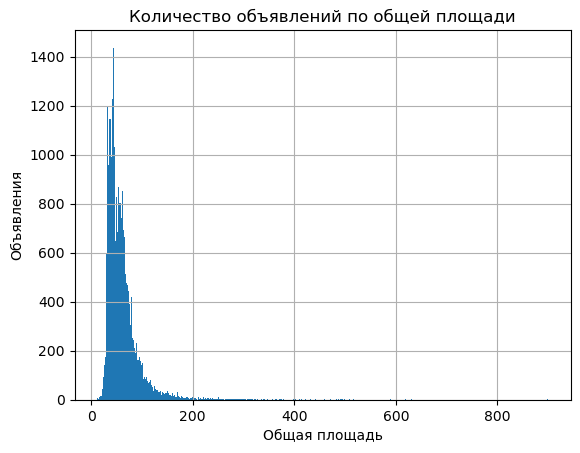

In [55]:
preprocessed_data['total_area'].hist(bins=np.histogram_bin_edges(preprocessed_data['total_area'], bins='auto'))

plt.title('Количество объявлений по общей площади')
plt.ylabel('Объявления')
plt.xlabel('Общая площадь')
plt.show()

Из гистограммы видно, что большинство значений лежат в диапазоне от \~10 до 200 кв. метров
Ограничим гистограмму этим диапазоном, чтобы лучше рассмотреть распределение

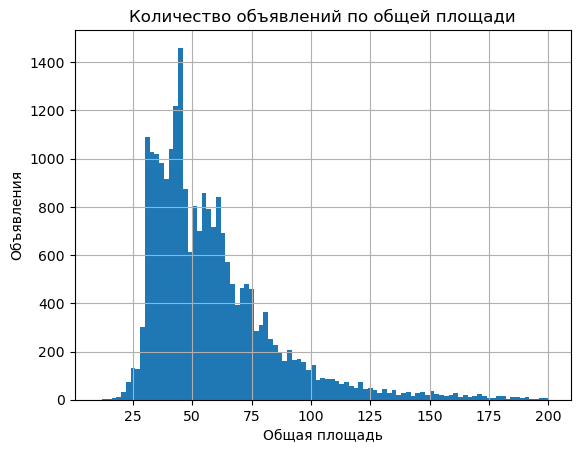

In [56]:
preprocessed_data['total_area'].hist(bins=np.histogram_bin_edges(preprocessed_data['total_area'], bins='auto', range=(10, 200)))

plt.title('Количество объявлений по общей площади')
plt.ylabel('Объявления')
plt.xlabel('Общая площадь')
plt.show()

Удалим выбросы, где общая площадь больше 200 кв. метров

In [57]:
preprocessed_data = preprocessed_data.query('total_area < 200')

Посмотрим на описание столбца для жилой площади

In [58]:
preprocessed_data['living_area'].describe()

count    23467.000000
mean        33.134461
std         17.190101
min          2.000000
25%         18.300000
50%         30.100000
75%         42.100000
max        164.700000
Name: living_area, dtype: float64

Построим гистограмму для жилой площади

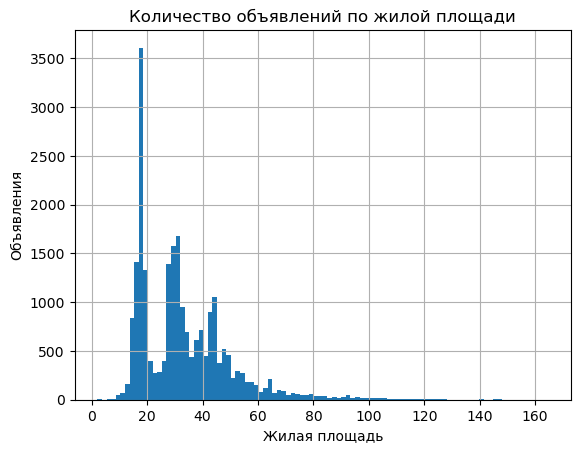

In [59]:
preprocessed_data['living_area'].hist(bins=np.histogram_bin_edges(preprocessed_data['living_area'], bins='auto'))

plt.title('Количество объявлений по жилой площади')
plt.ylabel('Объявления')
plt.xlabel('Жилая площадь')
plt.show()

Из гистограммы видно, что большинство значений лежат в диапазоне от ~6 до ~125 кв. метров
Ограничим гистограмму этим диапазоном, чтобы лучше рассмотреть распределение

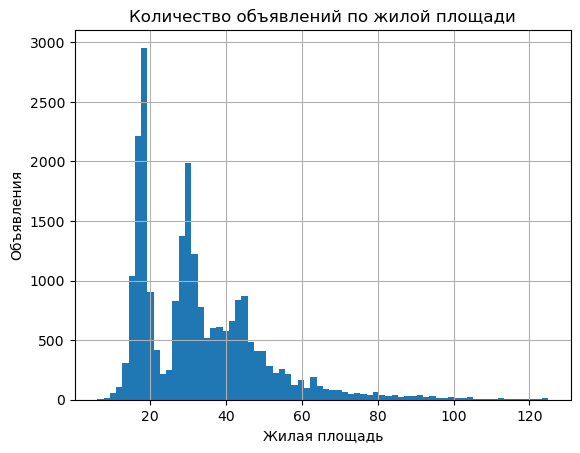

In [60]:
preprocessed_data['living_area'].hist(bins=np.histogram_bin_edges(preprocessed_data['living_area'], bins='auto', range=(6, 125)))

plt.title('Количество объявлений по жилой площади')
plt.ylabel('Объявления')
plt.xlabel('Жилая площадь')
plt.show()

Видим, что в промежутке от ~20 до ~25 кв. метров есть провал в распределении
Надо проверить, есть ли такая же проблема в исходных данных, так как возможно провал появился из-за заполнения пропусков

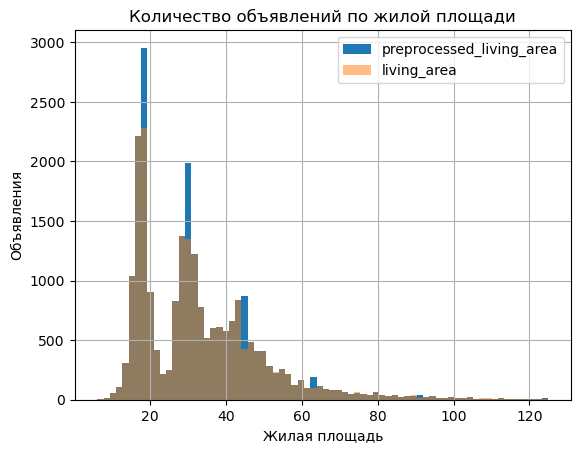

In [61]:
preprocessed_data['living_area'].hist(bins=np.histogram_bin_edges(preprocessed_data['living_area'], bins='auto', range=(6, 125)), label='preprocessed_living_area')
data['living_area'].hist(bins=np.histogram_bin_edges(preprocessed_data['living_area'], bins='auto', range=(6, 125)), legend=True, alpha=0.5)

plt.title('Количество объявлений по жилой площади')
plt.ylabel('Объявления')
plt.xlabel('Жилая площадь')
plt.show()

Видно, что в исходных данных также есть провал в распределении, хоть заполнение пропусков и усилило этот провал.
Уменьшим range для гистограммы, чтобы лучше рассмотреть провал в исходных данных

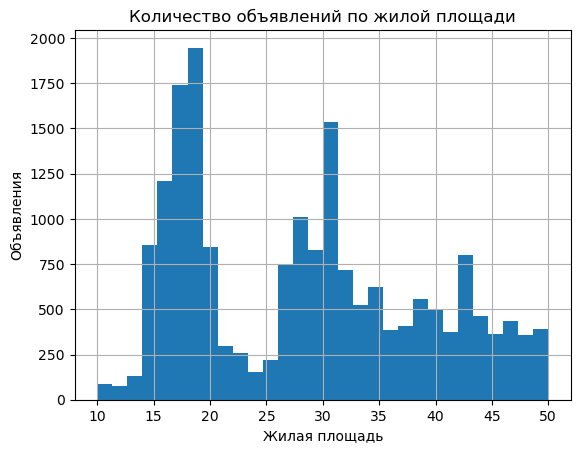

In [62]:
data['living_area'].hist(bins=np.histogram_bin_edges(data['living_area'], bins='auto', range=(10, 50)))

plt.title('Количество объявлений по жилой площади')
plt.ylabel('Объявления')
plt.xlabel('Жилая площадь')
plt.show()

Теперь ясно видно, что провал в распределении в диапазоне с 20 кв. метров до 30 кв. метров
Посмотрим на описание столбца для площади кухни, когда жилая площадь находится в этом диапазоне

In [63]:
data.query('20 < living_area < 30')['kitchen_area'].describe()

count    3590.000000
mean        8.958209
std         4.432873
min         2.000000
25%         6.200000
50%         7.800000
75%        10.045000
max        49.400000
Name: kitchen_area, dtype: float64

Удалим все выбросы, где желая площадь меньше 6 кв. и больше 125 кв. метров

In [64]:
preprocessed_data = preprocessed_data.query('6 < living_area < 125')

Осмотрим на описание столбца для площади кухни

In [65]:
preprocessed_data['kitchen_area'].describe()

count    23231.000000
mean        10.275073
std          5.137930
min          1.300000
25%          7.200000
50%          9.040000
75%         11.400000
max         93.200000
Name: kitchen_area, dtype: float64

Построим гистограмму для площади кухни без учёта пропусков (как помним из предыдущего шага, пропуски в площади кухни оставили для студий и квартир со свободной планировкой)

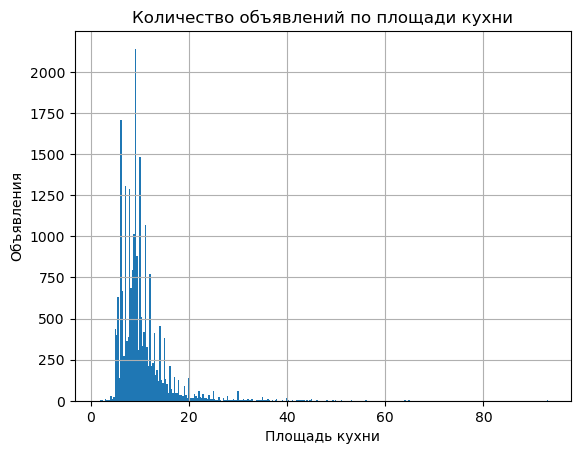

In [66]:
kitchen_area_without_null = preprocessed_data.query('kitchen_area.notnull()')['kitchen_area']

kitchen_area_without_null.hist(bins=np.histogram_bin_edges(kitchen_area_without_null, bins='auto'))

plt.title('Количество объявлений по площади кухни')
plt.ylabel('Объявления')
plt.xlabel('Площадь кухни')
plt.show()

Из гистограммы видно, что большинство значений лежат в диапазоне от ~5 до 40 кв. метров
Ограничим гистограмму этим диапазоном, чтобы лучше рассмотреть распределение

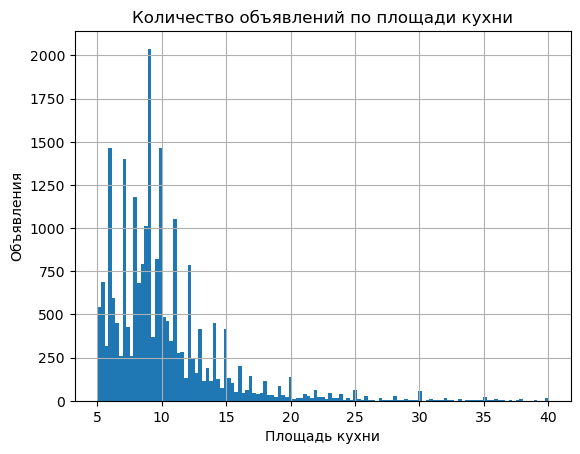

In [67]:
kitchen_area_without_null.hist(bins=np.histogram_bin_edges(kitchen_area_without_null, bins='auto', range=(5, 40)))

plt.title('Количество объявлений по площади кухни')
plt.ylabel('Объявления')
plt.xlabel('Площадь кухни')
plt.show()

Видно, что в данных есть много пиков и провалов в распределении.
Посмотрим есть ли такие же пики и провалы в исходных данных

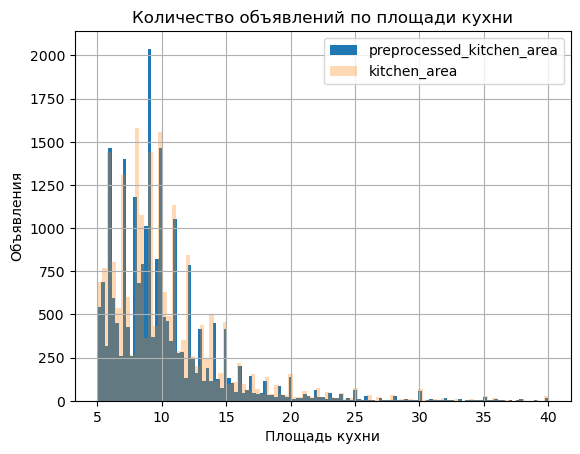

In [68]:
kitchen_area_without_null.hist(bins=np.histogram_bin_edges(kitchen_area_without_null, bins='auto', range=(5, 40)), label='preprocessed_kitchen_area')
data.query('kitchen_area.notnull()')['kitchen_area'].hist(bins=np.histogram_bin_edges(data.query('kitchen_area.notnull()')['kitchen_area'], bins='auto', range=(5, 40)), legend=True, alpha=0.3)

plt.title('Количество объявлений по площади кухни')
plt.ylabel('Объявления')
plt.xlabel('Площадь кухни')
plt.show()

Удалим выбросы, где площадь кухни больше 40 кв. метров и не пропуск, последнее не удаляем, так как это студии и квартиры со свободной планировкой

In [69]:
preprocessed_data = preprocessed_data.query('kitchen_area < 40 or kitchen_area.isnull()')

Посмотрим на описание столбца для высоты потолков

In [70]:
preprocessed_data['ceiling_height'].describe()

count    23313.000000
mean         2.702257
std          0.238374
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         10.000000
Name: ceiling_height, dtype: float64

Построим гистограмму для высоты потолков

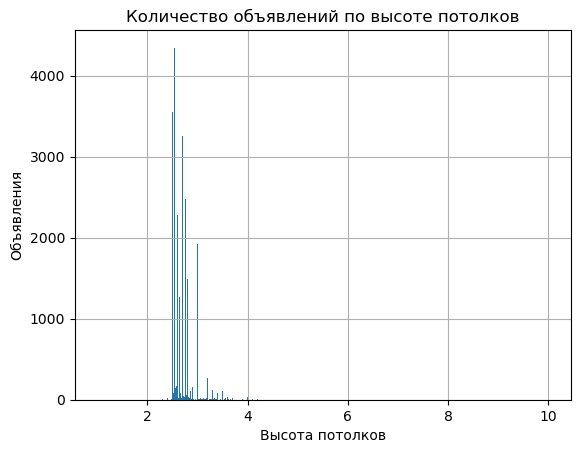

In [71]:
preprocessed_data['ceiling_height'].hist(bins=np.histogram_bin_edges(preprocessed_data['ceiling_height'], bins='auto'))

plt.title('Количество объявлений по высоте потолков')
plt.ylabel('Объявления')
plt.xlabel('Высота потолков')
plt.show()

Из гистограммы видно, что большинство значений лежат в диапазоне от ~2.5 до 3.5 метров
Ограничим гистограмму этим диапазоном, чтобы лучше рассмотреть распределение

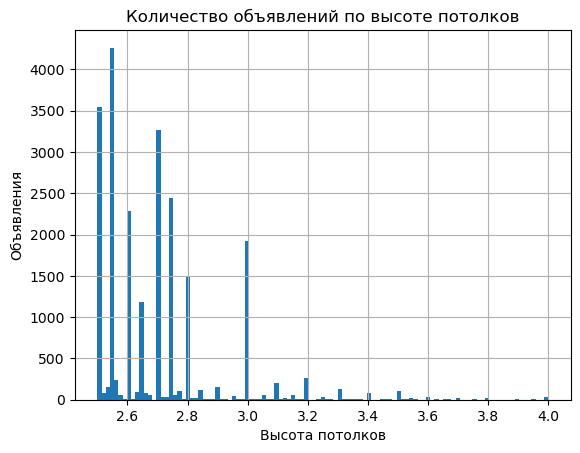

In [72]:
preprocessed_data['ceiling_height'].hist(bins=np.histogram_bin_edges(preprocessed_data['ceiling_height'], bins='auto', range=(2.5, 4)))

plt.title('Количество объявлений по высоте потолков')
plt.ylabel('Объявления')
plt.xlabel('Высота потолков')
plt.show()

Сравним распределение высоты потолков в исходных данных и в предобработанных

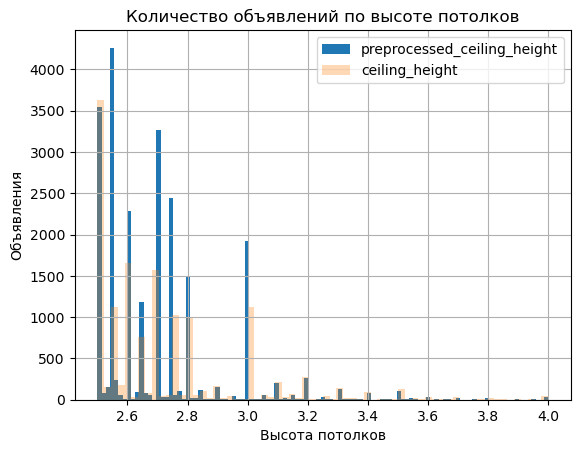

In [73]:
preprocessed_data['ceiling_height'].hist(bins=np.histogram_bin_edges(preprocessed_data['ceiling_height'], bins='auto', range=(2.5, 4)), label='preprocessed_ceiling_height')
data['ceiling_height'].hist(bins=np.histogram_bin_edges(data['ceiling_height'], bins='auto', range=(2.5, 4)), legend=True, alpha=0.3)

plt.title('Количество объявлений по высоте потолков')
plt.ylabel('Объявления')
plt.xlabel('Высота потолков')
plt.show()

Удалим выбросы, где высота потолков меньше 2.5 метров и больше 4 метров

In [74]:
preprocessed_data = preprocessed_data.query('2.5 < ceiling_height < 4')

Посмотрим на описание столбца для количества комнат

In [75]:
preprocessed_data['rooms'].describe()

count    19649.000000
mean         2.024378
std          0.999881
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

Построим гистограмму для количества комнат

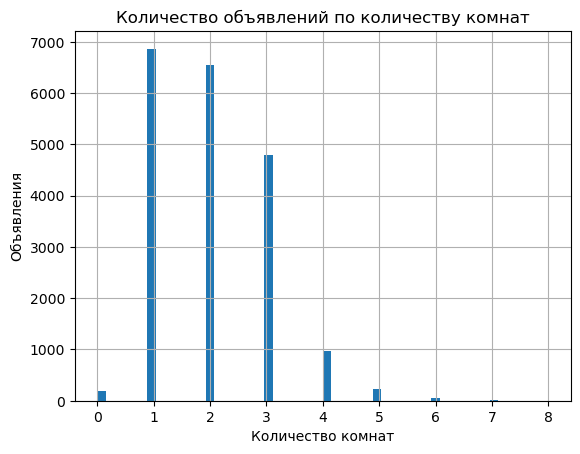

In [76]:
preprocessed_data['rooms'].hist(bins=np.histogram_bin_edges(preprocessed_data['rooms'], bins='auto'))

plt.title('Количество объявлений по количеству комнат')
plt.ylabel('Объявления')
plt.xlabel('Количество комнат')
plt.show()

Ограничим гистограмму диапазоном от 0 до 6, так как большинство значений лежат в этом диапазоне

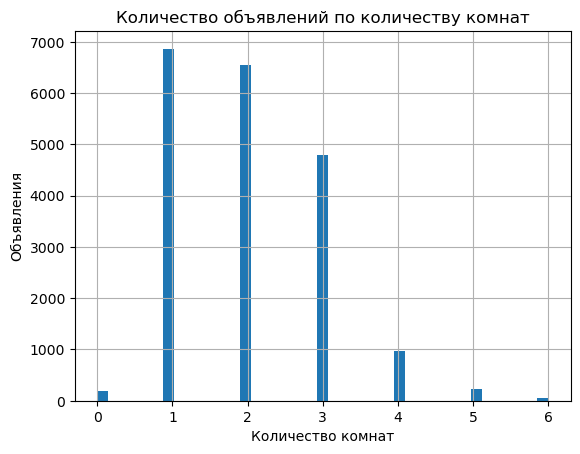

In [77]:
preprocessed_data['rooms'].hist(bins=np.histogram_bin_edges(preprocessed_data['rooms'], bins='auto', range=(0, 6)))

plt.title('Количество объявлений по количеству комнат')
plt.ylabel('Объявления')
plt.xlabel('Количество комнат')
plt.show()

Посчитаем количество значений для каждого количества комнат

In [78]:
preprocessed_data['rooms'].value_counts()

rooms
1    6862
2    6537
3    4782
4     973
5     238
0     191
6      51
7      13
8       2
Name: count, dtype: int64

Видим, что у нас 191 квартир с 0 комнат
Перепроверим являются ли такие квартиры студиями или квартирами со свободной планировкой

In [79]:
len(preprocessed_data.query('rooms == 0 and (is_studio == True or is_open_plan == True)'))

191

Удалим из выборки квартиры, где комнат больше 7, так как их очень мало и это выбросы

In [80]:
preprocessed_data = preprocessed_data.query('rooms < 7')

Посмотрим на описание столбца для цены объекта

In [81]:
preprocessed_data['last_price'].describe()

count    1.963400e+04
mean     6.191645e+06
std      5.728695e+06
min      4.300000e+05
25%      3.500000e+06
50%      4.800000e+06
75%      7.000000e+06
max      2.892384e+08
Name: last_price, dtype: float64

Построим гистограмму для цены объекта

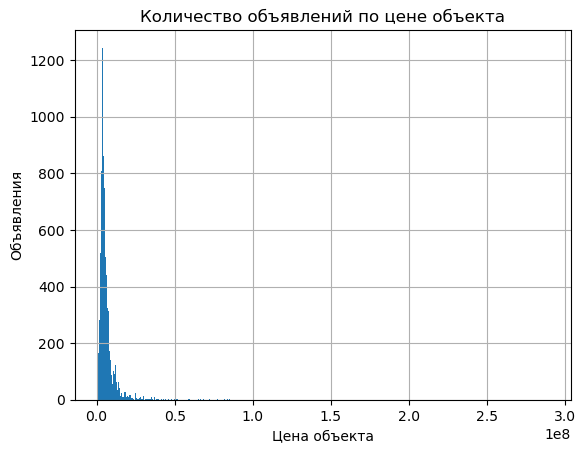

In [82]:
preprocessed_data['last_price'].hist(bins=np.histogram_bin_edges(preprocessed_data['last_price'], bins='auto'))

plt.title('Количество объявлений по цене объекта')
plt.ylabel('Объявления')
plt.xlabel('Цена объекта')
plt.show()

Ограничим гистограмму диапазоном от 0 до ~35 млн, так как большинство значений лежат в этом диапазоне

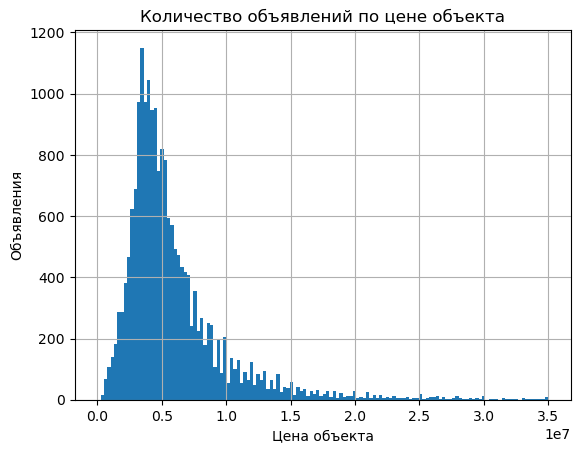

In [83]:
preprocessed_data['last_price'].hist(bins=np.histogram_bin_edges(preprocessed_data['last_price'], bins='auto', range=(0, 35000000)))

plt.title('Количество объявлений по цене объекта')
plt.ylabel('Объявления')
plt.xlabel('Цена объекта')
plt.show()

Удалим выбросы, где цена объекта больше 35 млн

In [84]:
preprocessed_data = preprocessed_data.query('last_price < 35000000')

Посмотрим на количество квартир в зависимости от типа этажа

In [85]:
preprocessed_data['floor_type'].value_counts()

floor_type
другой       14621
последний     2587
первый        2315
Name: count, dtype: int64

Построим гистограмму для количества квартир в зависимости от типа этажа

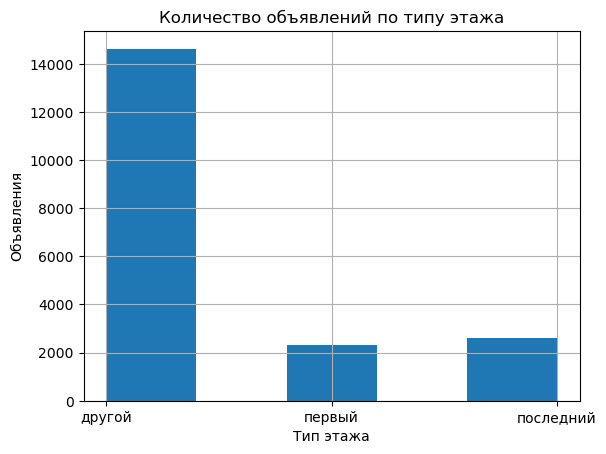

In [86]:
preprocessed_data['floor_type'].hist(bins=5)

plt.title('Количество объявлений по типу этажа')
plt.ylabel('Объявления')
plt.xlabel('Тип этажа')
plt.show()

Посмотрим на описание столбца для общего количества этажей в доме

In [87]:
preprocessed_data['floors_total'].describe()

count    19523.000000
mean        11.273472
std          6.890954
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Построим гистограмму для общего количества этажей в доме

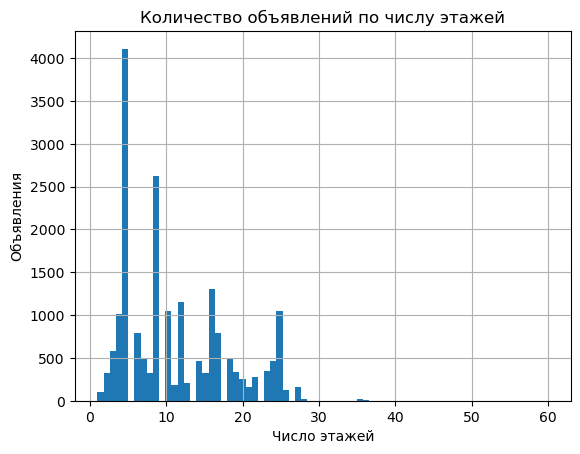

In [88]:
preprocessed_data['floors_total'].hist(bins=np.histogram_bin_edges(preprocessed_data['floors_total'], bins='auto'))

plt.title('Количество объявлений по числу этажей')
plt.ylabel('Объявления')
plt.xlabel('Число этажей')
plt.show()

Ограничим гистограмму диапазоном от 1 до 30, так как большинство значений лежат в этом диапазоне

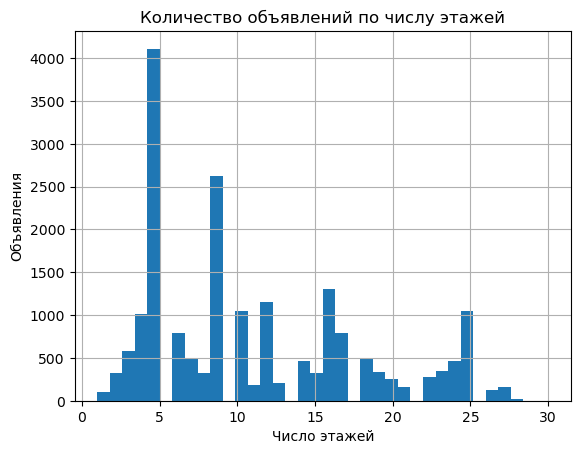

In [89]:
preprocessed_data['floors_total'].hist(bins=np.histogram_bin_edges(preprocessed_data['floors_total'], bins='auto', range=(1, 30)))

plt.title('Количество объявлений по числу этажей')
plt.ylabel('Объявления')
plt.xlabel('Число этажей')
plt.show()

Удалим выбросы, где общее количество этажей в доме больше 30

In [90]:
preprocessed_data = preprocessed_data.query('floors_total < 30')

Создадим переменную, где значения столбца 'city_centers_nearest_meters' без пропусков

In [91]:
city_centers_nearest_meters_without_null = preprocessed_data.query('city_centers_nearest_meters.notnull()')['city_centers_nearest_meters']

Посмотрим на описание столбца для расстояния до центра города в метрах

In [92]:
city_centers_nearest_meters_without_null.describe()

count    15670.000000
mean     14300.344416
std       8396.493577
min        181.000000
25%       9289.000000
50%      13222.000000
75%      16787.750000
max      65968.000000
Name: city_centers_nearest_meters, dtype: float64

Построим гистограмму для расстояния до центра города в метрах

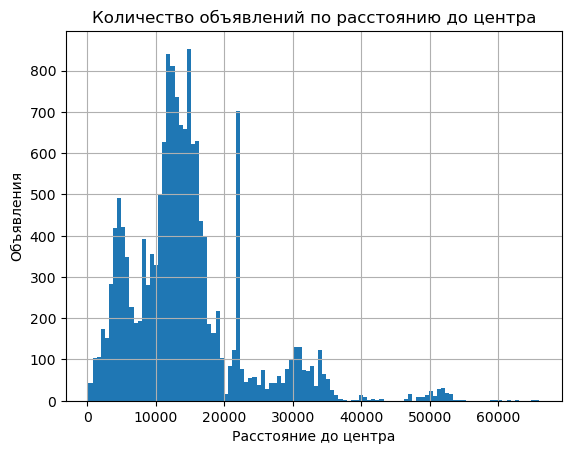

In [93]:
city_centers_nearest_meters_without_null.hist(bins=np.histogram_bin_edges(city_centers_nearest_meters_without_null, bins='auto'))

plt.title('Количество объявлений по расстоянию до центра')
plt.ylabel('Объявления')
plt.xlabel('Расстояние до центра')
plt.show()

Ограничим гистограмму диапазоном от 1 до 50000, так как большинство значений лежат в этом диапазоне

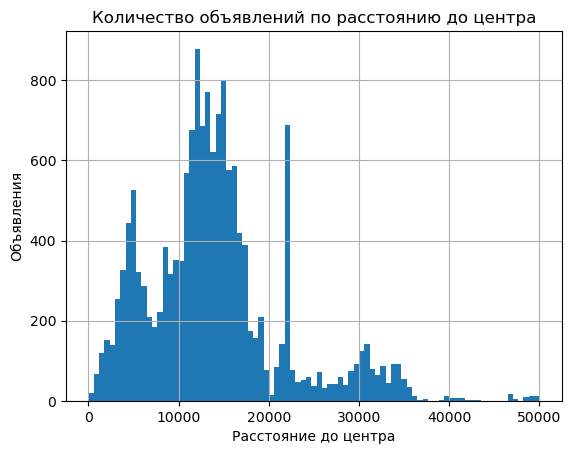

In [94]:
city_centers_nearest_meters_without_null.hist(bins=np.histogram_bin_edges(city_centers_nearest_meters_without_null, bins='auto', range=(0, 50000)))

plt.title('Количество объявлений по расстоянию до центра')
plt.ylabel('Объявления')
plt.xlabel('Расстояние до центра')
plt.show()

Сравним распределение расстояния до центра города в метрах в исходных данных и в предобработанных

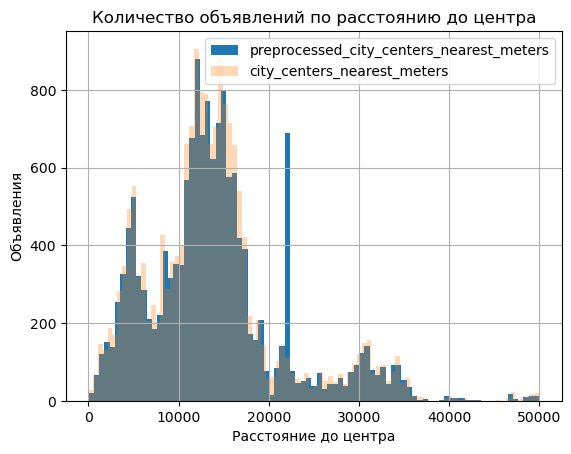

In [95]:
city_centers_nearest_meters_without_null.hist(bins=np.histogram_bin_edges(city_centers_nearest_meters_without_null, bins='auto', range=(0, 50000)), label='preprocessed_city_centers_nearest_meters')
data['city_centers_nearest_meters'].hist(bins=np.histogram_bin_edges(data['city_centers_nearest_meters'], bins='auto', range=(0, 50000)), legend=True, alpha=0.3)

plt.title('Количество объявлений по расстоянию до центра')
plt.ylabel('Объявления')
plt.xlabel('Расстояние до центра')
plt.show()

Удалим выбросы, где расстояние до центра города больше 50000 метров

In [96]:
preprocessed_data = preprocessed_data.query('city_centers_nearest_meters < 50000 or city_centers_nearest_meters.isnull()')

Создадим переменную, где значения столбца 'parks_nearest_meters' без пропусков

In [97]:
parks_nearest_meters_without_null = preprocessed_data.query('parks_nearest_meters.notnull()')['parks_nearest_meters']

Посмотрим на описание столбца для расстояния до ближайшего парка

In [98]:
parks_nearest_meters_without_null.describe()

count    6547.000000
mean      498.840385
std       356.665642
min         1.000000
25%       288.000000
50%       456.000000
75%       619.000000
max      3190.000000
Name: parks_nearest_meters, dtype: float64

Построим гистограмму для расстояния до ближайшего парка

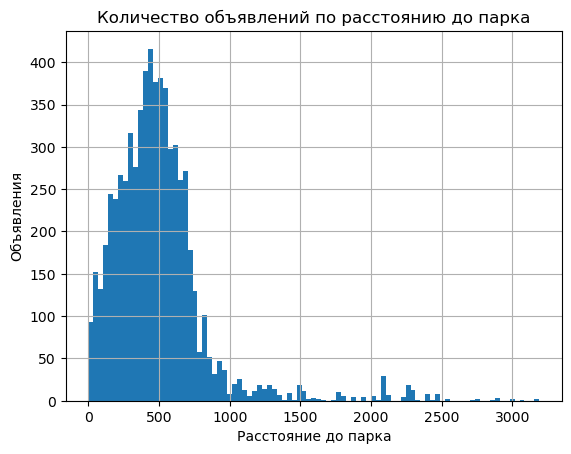

In [99]:
parks_nearest_meters_without_null.hist(bins=np.histogram_bin_edges(parks_nearest_meters_without_null, bins='auto'))

plt.title('Количество объявлений по расстоянию до парка')
plt.ylabel('Объявления')
plt.xlabel('Расстояние до парка')
plt.show()

Ограничим гистограмму диапазоном от 0 до 2500, так как большинство значений лежат в этом диапазоне

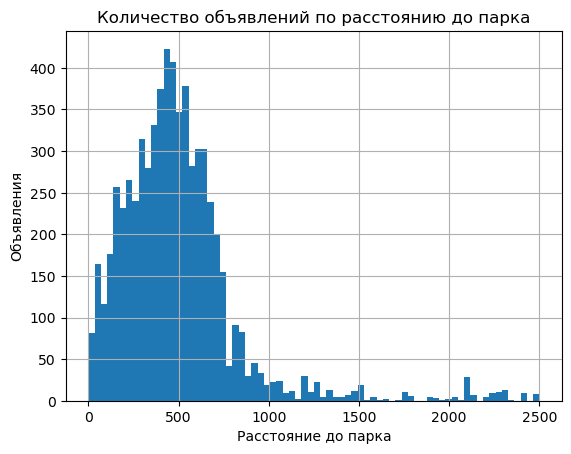

In [100]:
parks_nearest_meters_without_null.hist(bins=np.histogram_bin_edges(parks_nearest_meters_without_null, bins='auto', range=(0, 2500)))

plt.title('Количество объявлений по расстоянию до парка')
plt.ylabel('Объявления')
plt.xlabel('Расстояние до парка')
plt.show()

Удалим выбросы, где расстояние до ближайшего парка больше 2500 метров

In [101]:
preprocessed_data = preprocessed_data.query('parks_nearest_meters < 2500 or parks_nearest_meters.isnull()')

#### Вывод по изучению и описанию параметров
<a name="description-parameters-summary"></a>
После предобработки данных были изучены следующие параметры:
- Общая площадь: большинство значений лежат в диапазоне от \~10 до 200 кв. метров. Свыше 200 кв. метров были выбросы, но их количество было незначительным и их можно было удалить. Значения там, думаю, что были вполне реальными - скорее всего была элитная недвижимость, например, коттеджи, пентхаусы и тому подобное. Но в анализе они могли бы исказить картину.
- Жилая площадь: большинство значений лежат в диапазоне от \~6 до \~125 кв. метров, выбросы я удалил. Я взял диапазон от 6, так как это минимальная жилая площадь. В данных был провал в распределении в диапазоне с 20 кв. метров до 30 кв. метров. Я проверил описание столбца площади кухни для этого провала и примерная медианная площадь там \~8 кв. метров, максимальная около 50. Такое возможно, когда кухня и гостиная совмещены и из-за этого довольно большое помещение в квартире не может являться жилой площадью. (Я не беру в расчёт студии - там другая ситуация). Также в квартирах могут быть гардеробные и большие коридоры, а это всё то же нежилая площадь. Поэтому провал - скорее всего новые квартиры, которые начали строить по другим стандартам. При этом пики в районах \~19 и \~31 кв. метрах обуславливаются советской застройкой с их типовыми квартирами и примерно одинаковой площадью.
- Площадь кухни: большинство значений лежат в диапазоне от \~5 до 40 кв. метров, выбросы я также удалил. В данных было много пиков и провалов в распределении. Возможно это связано опять же с типовой застройкой и определёнными стандартами в размерах кухни. Поэтому и появляются пики, так как их стараются делать примерно одинаковых размеров, в зависимости от размера квартиры.
- Высота потолков: большинство значений лежат в диапазоне от \~2.5 до 4 метров, выбросы я удалил. Я взял начало от 2.5, так как это минимальная высота потолков, положенная по закону. В выбросах есть провалы и пики, большинство связаны с тем, что я заполнял пропущенные данные, в зависимости от количества этажей. Также в высоте потолков есть определённые стандарты и это видно на гистограмме.
- Количество комнат: большинство значений лежат в диапазоне от 1 до 7 комнат, выбросы я удалил. Есть квартиры с 0 комнат, но как я выяснил это либо студии, либо квартиры со свободной планировкой, там по сути комнат нет - всё одно единое жилое помещение.
- Цена объекта: большинство значений лежат в диапазоне от 0 до \~35 млн, выбросы я удалил. Цены больше скорее всего обусловлены тем, что это была элитная недвижимость. В целом, на графике мы видим нормальное распределение.
- Тип этажа: большинство значений приходится на "другой" тип этажа, что логично, так как квартир на первом и последнем этаже меньше. При этом, квартир на последнем этаже немного больше, чем на первом.
- Общее количество этажей в доме: большинство значений лежат в диапазоне от 1 до 30, выбросы я удалил. В данных мы видим большое количество пиков и провалов, но это нормально для количества этажей, так как есть типовое количество этажей, их как раз можно заметить на гистограмме. Да и полтора этажа быть не может, поэтому проблем с данными нет.
- Расстояние до центра города в метрах: большинство значений лежат в диапазоне от 0 до 50000 метров, выбросы я удалил. В данных есть всплески, так как какие-то значения я заполнял медианой в зависимости от населённого пункта. При этом важно понимать, что это данные не по одному городу, а по разным, где у них есть разная площадь и соответственно разное среднее расстояние до центра. Так в Петербурге расстояние до центра для конкретной квартиры может быть гораздо больше, чем в том же Пушкине.
- Расстояние до ближайшего парка: большинство значений лежат в диапазоне от 0 до 2500 метров, выбросы я удалил. В целом, распределение можно назвать нормальным.

В итоге, я исключил выбросы из параметров и обработал аномалии, которые были замечены. Теперь на основе данных параметров можно вести дальнейшее иследование и определять рыночную стоимость объектов недвижимости.

### Изучите, как быстро продаются квартиры

Построим гистограмму для столбца 'days_exposition'

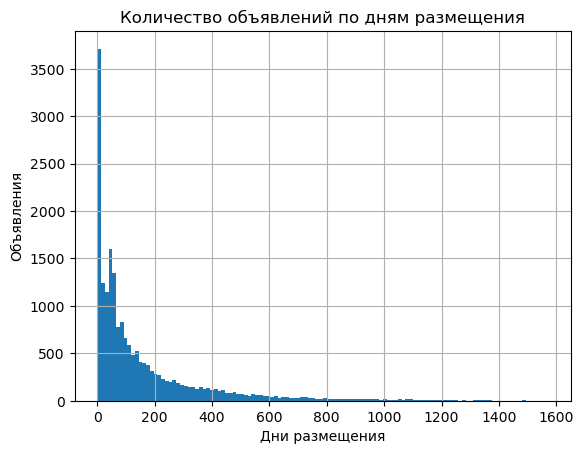

In [102]:
preprocessed_data['days_exposition'].hist(bins=np.histogram_bin_edges(preprocessed_data['days_exposition'], bins='auto'))

plt.title('Количество объявлений по дням размещения')
plt.ylabel('Объявления')
plt.xlabel('Дни размещения')
plt.show()

Ограничим гистограмму диапазоном от 1 до 1200, чтобы лучше рассмотреть распределение.
Начинаем с 1, так как 0 - означает, что объявление ещё не снято, а до 1200 большинство значений.

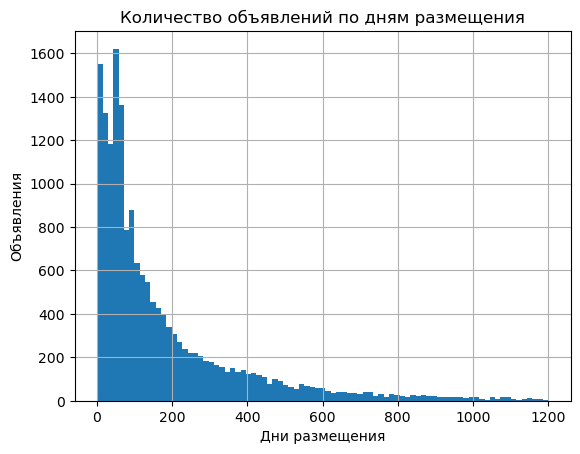

In [103]:
preprocessed_data['days_exposition'].hist(bins=np.histogram_bin_edges(preprocessed_data['days_exposition'], bins='auto', range=(1, 1200)))

plt.title('Количество объявлений по дням размещения')
plt.ylabel('Объявления')
plt.xlabel('Дни размещения')
plt.show()

Посмотрим на описание столбца для 'days_exposition'

In [104]:
preprocessed_data.query('1 < days_exposition < 1200')['days_exposition'].describe()

count    16898.000000
mean       175.523020
std        205.399837
min          2.000000
25%         45.000000
50%         95.000000
75%        228.000000
max       1199.000000
Name: days_exposition, dtype: float64

#### Вывод по изучению, как быстро продаются квартиры
<a name="how-quickly-apartments-sell-summary"></a>
Из гистограммы видно, что большинство значений лежат в диапазоне от 1 до 1200 дней. При этом среднее значение равно \~189 дням, а медианное - 105 дней. Таким образом, можно сказать, что обычно продажа квартиры занимает от \~3 месяцев (105 дней) до \~6 месяцев (200 дней).
Можно считать, что продажа квартиры заняла мало времени, если она была продана менее чем за \~50 дней. Долгая если более \~200 дней, а необычно долгая, если более ~400 дней. При этом в гистограмме видно распределение Пуассона, так что данные вполне реальные.

### Определите факторы, которые больше всего влияют на стоимость квартиры

Предварительно создадим функции, которые нам помогут для определения факторов, влияющих на стоимость квартиры

In [105]:
# Функция для построения графика типа hexbin
def hexbin_plot_by_last_price(x):
    preprocessed_data.plot(x=x, y='last_price', kind='hexbin', gridsize=20, sharex=False, grid=True, figsize=(10, 6))

# Функция для построения графика типа scatter
def scatter_plot_by_last_price(x):
    preprocessed_data.plot(x=x, y='last_price', kind='scatter', alpha=0.1)

# Функция для построения графика типа bar
def bar_plot_by_median_last_price(pivot_table_by_last_price):
    pivot_table_by_last_price.plot(y='median_last_price', kind='bar', figsize=(10, 6))
    
# Функция для определения коэффициента корреляции
def correlation_by_last_price(x):
    return preprocessed_data['last_price'].corr(preprocessed_data[x])

# Функция для группировки данных по столбцу и подсчёта количества объявлений и медианной цены
def grouped_data_by_last_price_count_median(index):
    grouped = preprocessed_data.pivot_table(index=index, values='last_price', aggfunc=['count', 'median'])
    grouped.columns = ['count', 'median_last_price']
    return grouped.sort_values(by='median_last_price', ascending=False)

Изучим, зависит ли цена от общей площади

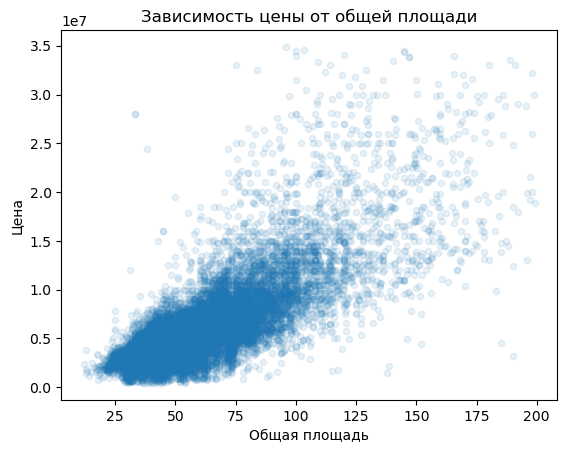

In [106]:
scatter_plot_by_last_price('total_area')

plt.title('Зависимость цены от общей площади')
plt.ylabel('Цена')
plt.xlabel('Общая площадь')
plt.show()

Построим график типа hexbin для общей площади и цены, чтобы лучше рассмотреть распределение

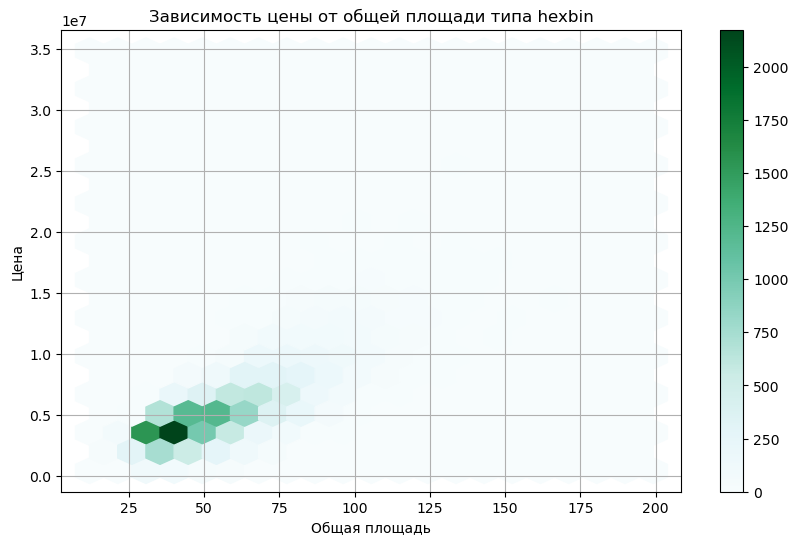

In [107]:
hexbin_plot_by_last_price('total_area')

plt.title('Зависимость цены от общей площади типа hexbin')
plt.ylabel('Цена')
plt.xlabel('Общая площадь')
plt.show()

Посмотрим на коэффициент корреляции между ценой и общей площадью

In [108]:
correlation_by_last_price('total_area')

0.7785883147214333

Изучим, зависит ли цена от жилой площади

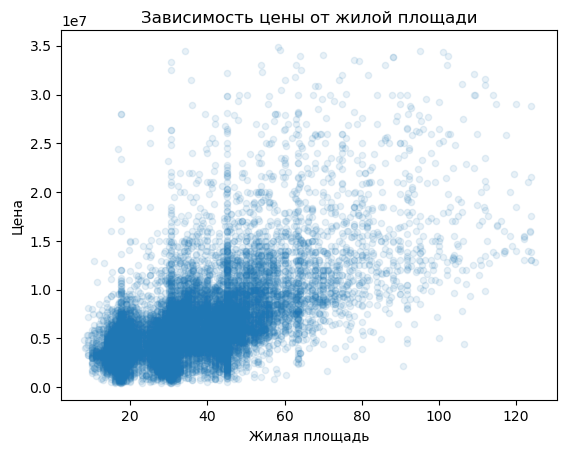

In [109]:
scatter_plot_by_last_price('living_area')

plt.title('Зависимость цены от жилой площади')
plt.ylabel('Цена')
plt.xlabel('Жилая площадь')
plt.show()

Построим график типа hexbin для жилой площади и цены, чтобы лучше рассмотреть распределение

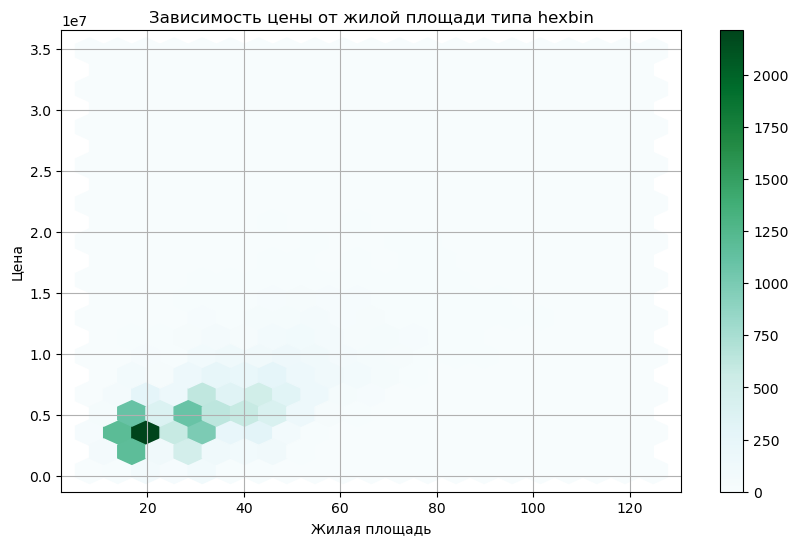

In [110]:
hexbin_plot_by_last_price('living_area')

plt.title('Зависимость цены от жилой площади типа hexbin')
plt.ylabel('Цена')
plt.xlabel('Жилая площадь')
plt.show()

Посмотрим на коэффициент корреляции между ценой и жилой площадью

In [111]:
correlation_by_last_price('living_area')

0.6501791847655748

Изучим, зависит ли цена от площади кухни

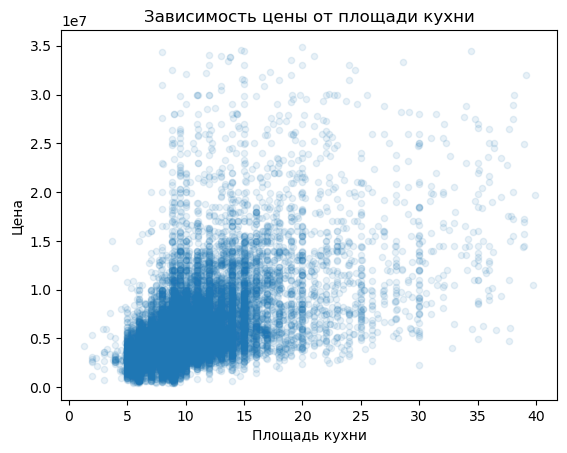

In [112]:
scatter_plot_by_last_price('kitchen_area')

plt.title('Зависимость цены от площади кухни')
plt.ylabel('Цена')
plt.xlabel('Площадь кухни')
plt.show()

Построим график типа hexbin для площади кухни и цены, чтобы лучше рассмотреть распределение

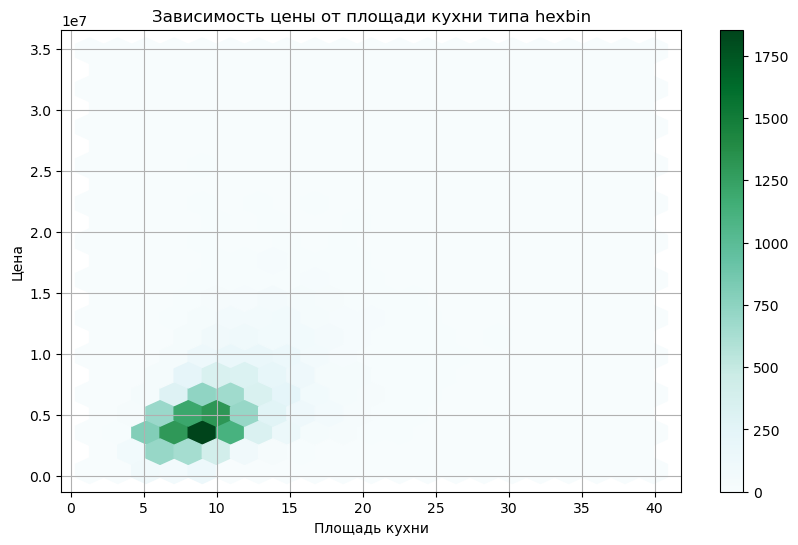

In [113]:
hexbin_plot_by_last_price('kitchen_area')

plt.title('Зависимость цены от площади кухни типа hexbin')
plt.ylabel('Цена')
plt.xlabel('Площадь кухни')
plt.show()

Посмотрим на коэффициент корреляции между ценой и площадью кухни

In [114]:
correlation_by_last_price('kitchen_area')

0.5418980679824026

Изучим, зависит ли цена от количества комнат.
Сгруппируем данные по количеству комнат и посмотрим на количество объявлений и медианную цену и отсортируем по последней.

In [115]:
grouped_data_by_last_price_count_median('rooms')

,count,median_last_price
rooms,,
6,48,13015000
5,223,12000000
4,938,9200000
3,4695,6500000
2,6453,5000000
1,6802,3690000
0,189,2700000


Визуализируем зависимость от количества комнат

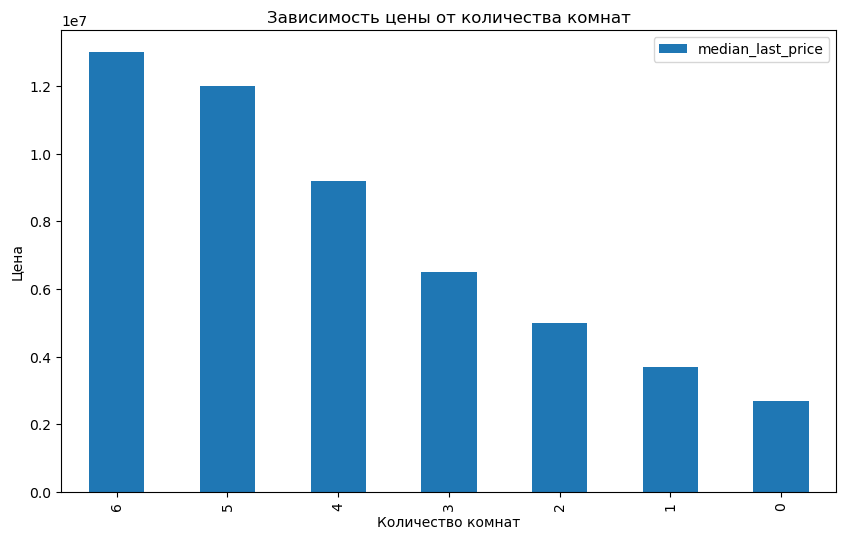

In [116]:
bar_plot_by_median_last_price(grouped_data_by_last_price_count_median('rooms'))

plt.title('Зависимость цены от количества комнат')
plt.ylabel('Цена')
plt.xlabel('Количество комнат')
plt.show()

Изучим, зависит ли цена от типа этажа
Опять же сгруппируем данные по типу этажа и посмотрим на количество объявлений и медианную цену и отсортируем по последней

In [117]:
grouped_data_by_last_price_count_median('floor_type')

,count,median_last_price
floor_type,,
другой,14511,4985000
последний,2556,4500000
первый,2281,4000000


Визуализируем зависимость от типа этажа

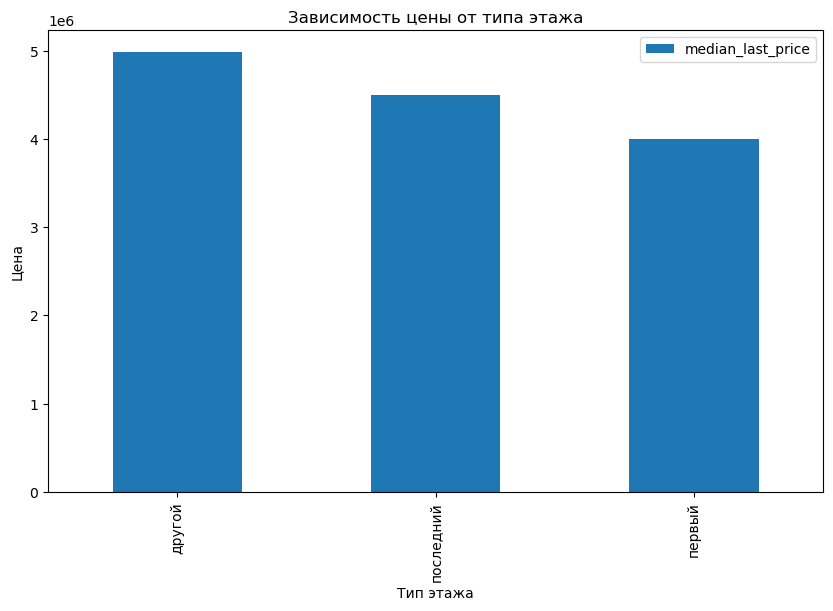

In [118]:
bar_plot_by_median_last_price(grouped_data_by_last_price_count_median('floor_type'))

plt.title('Зависимость цены от типа этажа')
plt.ylabel('Цена')
plt.xlabel('Тип этажа')
plt.show()

Изучим, зависит ли цена от даты размещения
Сначала посмотрим на зависимость цены от дня недели
Тут нужно сделать как и в случае с количеством комнат и типом этажа

In [119]:
grouped_data_by_last_price_count_median('weekday_exposition')

,count,median_last_price
weekday_exposition,,
1,3427,4890000
2,3258,4850000
0,2890,4837500
3,3496,4800000
4,3308,4700000
5,1574,4650000
6,1395,4650000


Визуализируем зависимость от дня недели

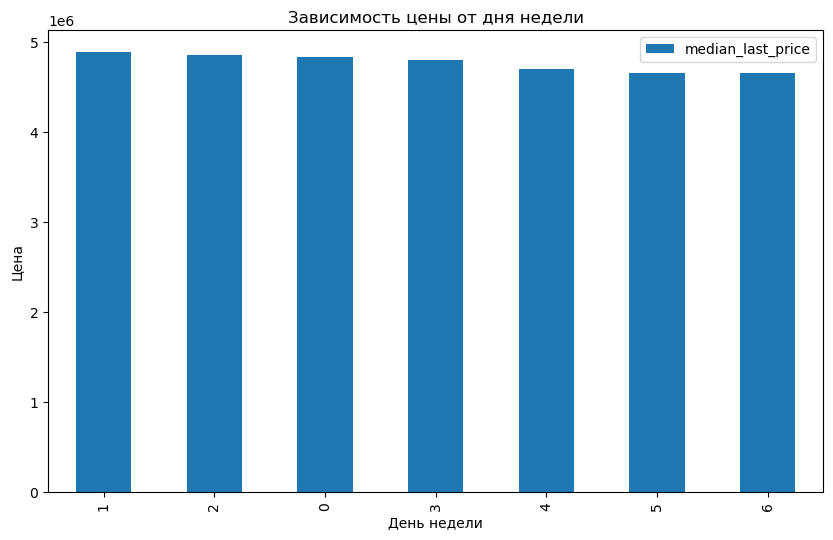

In [120]:
bar_plot_by_median_last_price(grouped_data_by_last_price_count_median('weekday_exposition'))

plt.title('Зависимость цены от дня недели')
plt.ylabel('Цена')
plt.xlabel('День недели')
plt.show()

То же самое сделаем для месяца размещения

In [121]:
grouped_data_by_last_price_count_median('month_exposition')

,count,median_last_price
month_exposition,,
4,1923,4990000
1,1229,4850000
3,2029,4850000
9,1618,4830000
11,1944,4817500
2,2132,4800000
8,1424,4796000
12,1358,4795000
7,1392,4782500


Визуализируем зависимость от месяца размещения

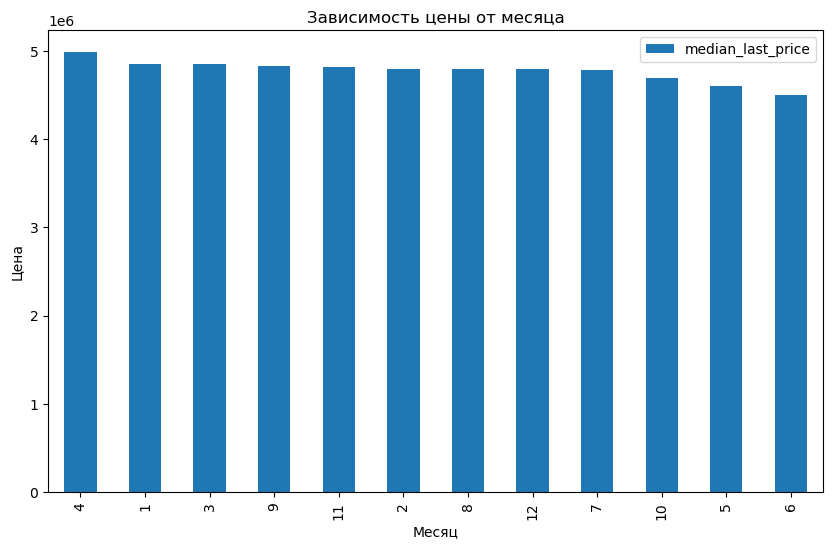

In [122]:
bar_plot_by_median_last_price(grouped_data_by_last_price_count_median('month_exposition'))

plt.title('Зависимость цены от месяца')
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.show()

И для года размещения

In [123]:
grouped_data_by_last_price_count_median('year_exposition')

,count,median_last_price
year_exposition,,
2014,115,8037000
2019,2155,5395000
2015,1023,5301000
2018,6680,4772669
2016,2406,4650000
2017,6969,4600000


Визуализируем зависимость от года размещения

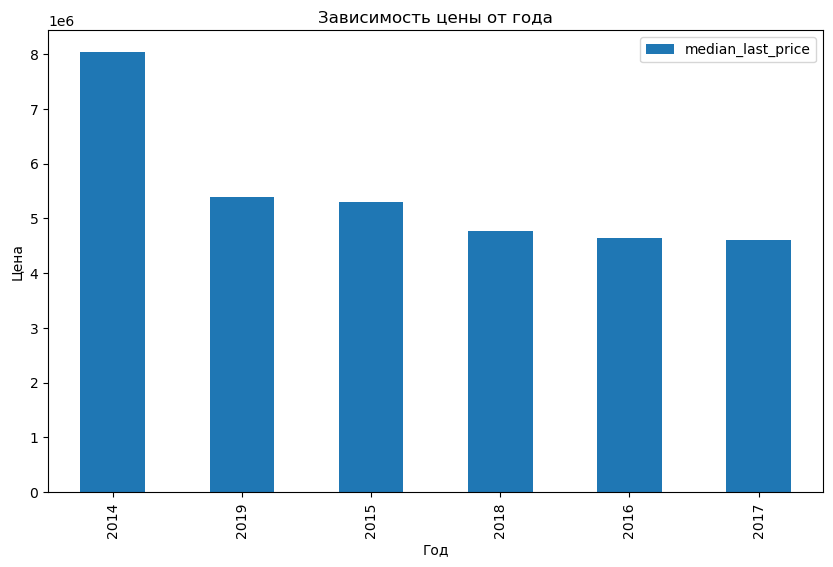

In [124]:
bar_plot_by_median_last_price(grouped_data_by_last_price_count_median('year_exposition'))

plt.title('Зависимость цены от года')
plt.ylabel('Цена')
plt.xlabel('Год')
plt.show()

#### Вывод по определению факторов, влияющих на стоимость квартиры
<a name="determining-factors-affecting-price-summary"></a>
Из графиков и коэффициентов корреляции видно, что цена квартиры зависит от общей площади, жилой площади и количества комнат. При этом зависимость от площади кухни есть, но гораздо слабее.
Видно, что если этаж не первый и не последний, то цена немного выше. Это скорее всего связано с неудобствами жить на первом или последнем этажах.
Зависимость от дня недели тоже не такая сильная, но видно, что квартиры выложенные в начале неделе обычно немного дороже, чем квартиры, которые выложены к концу. По месяцам ситуация та же, видно, что квартиры выложенные в начале года немного дороже, чем квартиры те, которые опубликовали в конце.
Заметно как меняется цена квартир в зависимости от года скорее всего это связано с экономической и политической ситуации в стране. Также не будем забывать о ежегодной инфляции.

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Сгруппируем данные по населённым пунктам и посчитаем количество объявлений и среднюю цену квадратного метра, а затем отсортируем по количеству объявлений.
Для устойчивости к выбросам, будем использовать медианное значение средней цены.

In [125]:
grouped_data_by_locality_name = preprocessed_data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'median'])
grouped_data_by_locality_name.columns = ['count', 'median_price_per_square_meter']
grouped_data_by_locality_name = grouped_data_by_locality_name.sort_values(by='count', ascending=False)
grouped_data_by_locality_name.head(10)

,count,median_price_per_square_meter
locality_name,,
Санкт-Петербург,13001,105566.220
Мурино,578,86093.530
Кудрово,467,95522.390
Шушары,410,76876.175
Всеволожск,364,65855.775
Парголово,311,92051.280
Пушкин,279,100000.000
Гатчина,234,68350.915
Колпино,233,74733.100


Населённый пункт с самой высокой стоимостью квадратного метра

In [126]:
grouped_data_by_locality_name.head(10).sort_values(by='median_price_per_square_meter', ascending=False).head(1)

,count,median_price_per_square_meter
locality_name,,
Санкт-Петербург,13001,105566.22


Населённый пункт с самой низкой стоимостью квадратного метра

In [127]:
grouped_data_by_locality_name.head(10).sort_values(by='median_price_per_square_meter', ascending=True).head(1)

,count,median_price_per_square_meter
locality_name,,
Выборг,194,58133.215


#### Вывод по подсчёту средней цены одного квадратного метра
<a name="average-price-of-one-square-meter-summary"></a>
Самая высокая стоимость квадратного метра в Санкт-Петербурге (\~105566 за кв. метр), а самая низкая в Выборге (\~58133 за кв. метр). Это вполне логично, так как Санкт-Петербург - это крупный мегаполис, а Выборг - небольшой городок.
Это отражается и на количестве объявлений, в Санкт-Петербурге их больше всего (13001 штук), а в Выборге меньше всего (194 штуки).

### Выделите квартиры в Санкт-Петербурге и посчитайте среднюю цену для каждого километра от центра

Выделим квартиры в Санкт-Петербурге

In [128]:
flats_in_spb = preprocessed_data.query('locality_name == "Санкт-Петербург"')

Посчитаем среднюю цену для каждого километра от центра используя столбец city_centers_nearest_km и запишем в переменную flats_in_spb_by_centers_km

In [129]:
flats_in_spb_by_centers_km = flats_in_spb.pivot_table(index='city_centers_nearest_km', values='last_price')
flats_in_spb_by_centers_km

,last_price
city_centers_nearest_km,
0.0,1.153201e+07
1.0,1.105691e+07
2.0,9.928683e+06
3.0,9.723925e+06
4.0,1.075260e+07
5.0,1.031523e+07
6.0,1.002939e+07
7.0,9.008239e+06
8.0,8.613198e+06


Построим график зависимости цены от расстояния до центра

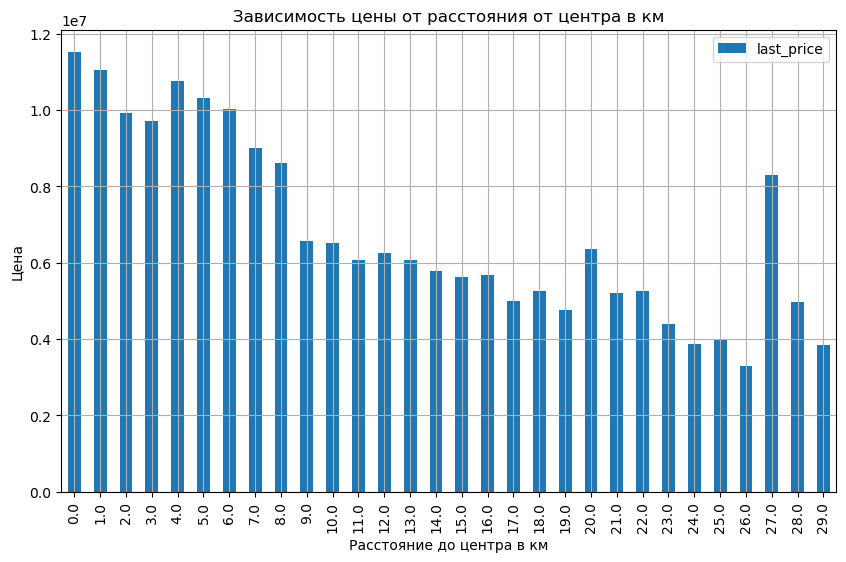

In [130]:
flats_in_spb_by_centers_km.plot(y='last_price', kind='bar', figsize=(10, 6), grid=True)

plt.title('Зависимость цены от расстояния от центра в км')
plt.ylabel('Цена')
plt.xlabel('Расстояние до центра в км')
plt.show()

#### Вывод по подсчёту средней цены для каждого километра от центра в Санкт-Петербурге
<a name="price-distance-to-center-summary"></a>
Из графика видно, что цена на квартиры в Санкт-Петербурге снижается с увеличением расстояния до центра. Это вполне логично, так как в центре обычно находятся деловые и культурные центры, а также там лучше развита инфраструктура. Поэтому квартиры в центре обычно дороже, чем на окраинах. Виден всплеск на 27 км, но данных на этом расстоянии мало, поэтому это скорее всего выброс.

### Напишите общий вывод

#### Общий вывод

В ходе выполнения проекта изначально были предобработаны данные:
- Обнаружены и заполнены пропущенные значения в `'balcony_total'`, `'floors_total'`, `'locality_name'`, `'parks_around_3k_meters'`, `'ponds_around_3k_meters'`, `'days_exposition'`, `'is_apartment'`, `'ceiling_height'`, `'living_area'`. В столбцах `'kitchen_area'`, `'ponds_nearest_meters'`, `'parks_nearest_meters'`, `'city_centers_nearest_meters'` и `'airports_nearest_meters'` не везде получилось заполнить пропуски.
- Изменены типы данных в столбцах `'first_day_exposition'`, `'floors_total'`, `'balcony_total'`, `'parks_around_3k_meters'`, `'ponds_around_3k_meters'`, `'days_exposition'` и `'last_price'`.
- Устранены неявные дубликаты в названиях населённых пунктов (`'locality_name'`).
[Подробнее в выводе о предобработке данных](#preprocessing-data-summary)

В целом замечу, что в данных было много пропущенных значений, особенно в данных, которые были получены автоматически. Считаю, что в будущем нужно быть аккуратнее с автоматическим заполнение данных, а если оно производится, то описывать полную логику того как это работало.

После предобработки данных были добавлены новые параметры:
- `'price_per_square_meter'` - цена одного квадратного метра;
- `'weekday_exposition'` - день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
- `'month_exposition'` - месяц публикации объявления;
- `'year_exposition'` - год публикации объявления;
- `'floor_type'` - тип этажа квартиры (значения — «первый», «последний», «другой»);
- `'city_centers_nearest_km'` - расстояние до центра города в километрах.
[Подробнее в выводе о добавлении новых параметров](#adding-new-parameters-summary)

После этого были изучены и описаны параметры:
- Общая площадь;
- Жилая площадь;
- Площадь кухни;
- Цена объекта;
- Количество комнат;
- Высота потолков;
- Тип этажа квартиры («первый», «последний», «другой»);
- Общее количество этажей в доме;
- Расстояние до центра города в метрах;
- Расстояние до ближайшего парка.
В процессе были обработаны редкие и выбивающиеся значения (аномалии).
[Подробнее в выводе об изучении и описании параметров](#description-parameters-summary)

Также было изучено, как быстро продаются квартиры:
- Построена гистограмма;
- Рассчитаны среднее (\~189 дней) и медиана (105 дней);
- Описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми (менее чем за \~50 дней), а какие — необычно долгими (более \~200 дней).
[Подробнее в выводе об изучении, как быстро продаются квартиры](#how-quickly-apartments-sell-summary)

Были определены факторы, которые больше всего влияют на стоимость квартиры:
- Общая площадь - очень сильно влияет на цену;
- Жилая площадь - сильно влияет на цену;
- Площадь кухни - средне влияет на цену;
- Количество комнат - очень сильно влияет на цену;
- Тип этажа, на котором расположена квартира - если этаж не первый и не последний, то цена немного выше;
- Дата размещения - в начале недели и года квартиры обычно не сильно, но дороже. Год же сильнее влияет, так много зависит от экономической и политической ситуации в стране.
[Подробнее в выводе об определении факторов, влияющих на стоимость квартиры](#determining-factors-affecting-price-summary)

Была посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:
- Самая высокая стоимость квадратного метра в Санкт-Петербурге (\~112355 за кв. метр), а самая низкая в Выборге (\~58593 за кв. метр).
[Подробнее в выводе по подсчёту средней цены одного квадратного метра](#average-price-of-one-square-meter-summary)

Были выделены квартиры в Санкт-Петербурге и посчитана средняя цена для каждого километра от центра:
- Цена на квартиры в Санкт-Петербурге снижается с увеличением расстояния до центра.
[Подробнее в выводе по подсчёту средней цены для каждого километра от центра в Санкт-Петербурге](#price-distance-to-center-summary)

В целом, мы можем теперь определять рыночную стоимость квартиры, а также понимать, какие параметры влияют на эту стоимость. Как мне кажется, на основе данных исследований можно создать автоматизированную систему по поиску аномалий и мошенничества, а также предсказания цены квартиры.
